In [7]:
#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

#relevant ML libraries
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import umap

In [16]:
pre = pd.read_csv('./datasets/comparison_feature_data/train_pre.csv')
mid = pd.read_csv('./datasets/comparison_feature_data/train_mid.csv')
late = pd.read_csv('./datasets/comparison_feature_data/train_late.csv')

pre_all = pd.read_csv('./datasets/all_feature_data/train_pre.csv')
mid_all = pd.read_csv('./datasets/all_feature_data/train_mid.csv')
late_all = pd.read_csv('./datasets/all_feature_data/train_late.csv')

raw = pd.read_csv('./datasets/tmp_data_for_exploration/exploredata1.csv')

pre_all_gold = pd.read_csv('./datasets/all_feature_data/train_pre_gold.csv')
mid_all_gold = pd.read_csv('./datasets/all_feature_data/train_mid_gold.csv')
late_all_gold = pd.read_csv('./datasets/all_feature_data/train_late_gold.csv')

In [9]:
def runModel(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)
    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)
    #print accuracy
    print(classification_report(y_true=test_Y,y_pred=y_predict))
    #plot tree
    plt.figure()
    plt.figure(dpi=200,figsize=(16,10))
    plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

In [17]:
def runModel_Umap(data_train,max_depth):
    X_train, Y_train = data_train.drop(['TeamVictory'],axis=1),data_train[['TeamVictory']]
    #Creating a copy of data
    X_scale = X_train.copy()
    #Scaling
    scaler = StandardScaler()
    scaler.fit(X_scale)
    X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )

    #dimension reduction
    manifold = umap.UMAP()
    X_scale = manifold.fit_transform(X_scale)

    train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)
    #fit model
    DCT = DecisionTreeClassifier(max_depth=max_depth)
    DCT.fit(train_X,train_Y)
    y_predict = DCT.predict(test_X)
    #print accuracy
    print(classification_report(y_true=test_Y,y_pred=y_predict))
    #plot tree
    plt.figure()
    plt.figure(dpi=200,figsize=(16,10))
    plot_tree(DCT, filled=True)
    plt.title("Decision tree trained after pruning")
    plt.show()
    return DCT

              precision    recall  f1-score   support

         100       0.51      0.59      0.55       969
         200       0.53      0.45      0.48      1001

    accuracy                           0.52      1970
   macro avg       0.52      0.52      0.52      1970
weighted avg       0.52      0.52      0.52      1970



<Figure size 640x480 with 0 Axes>

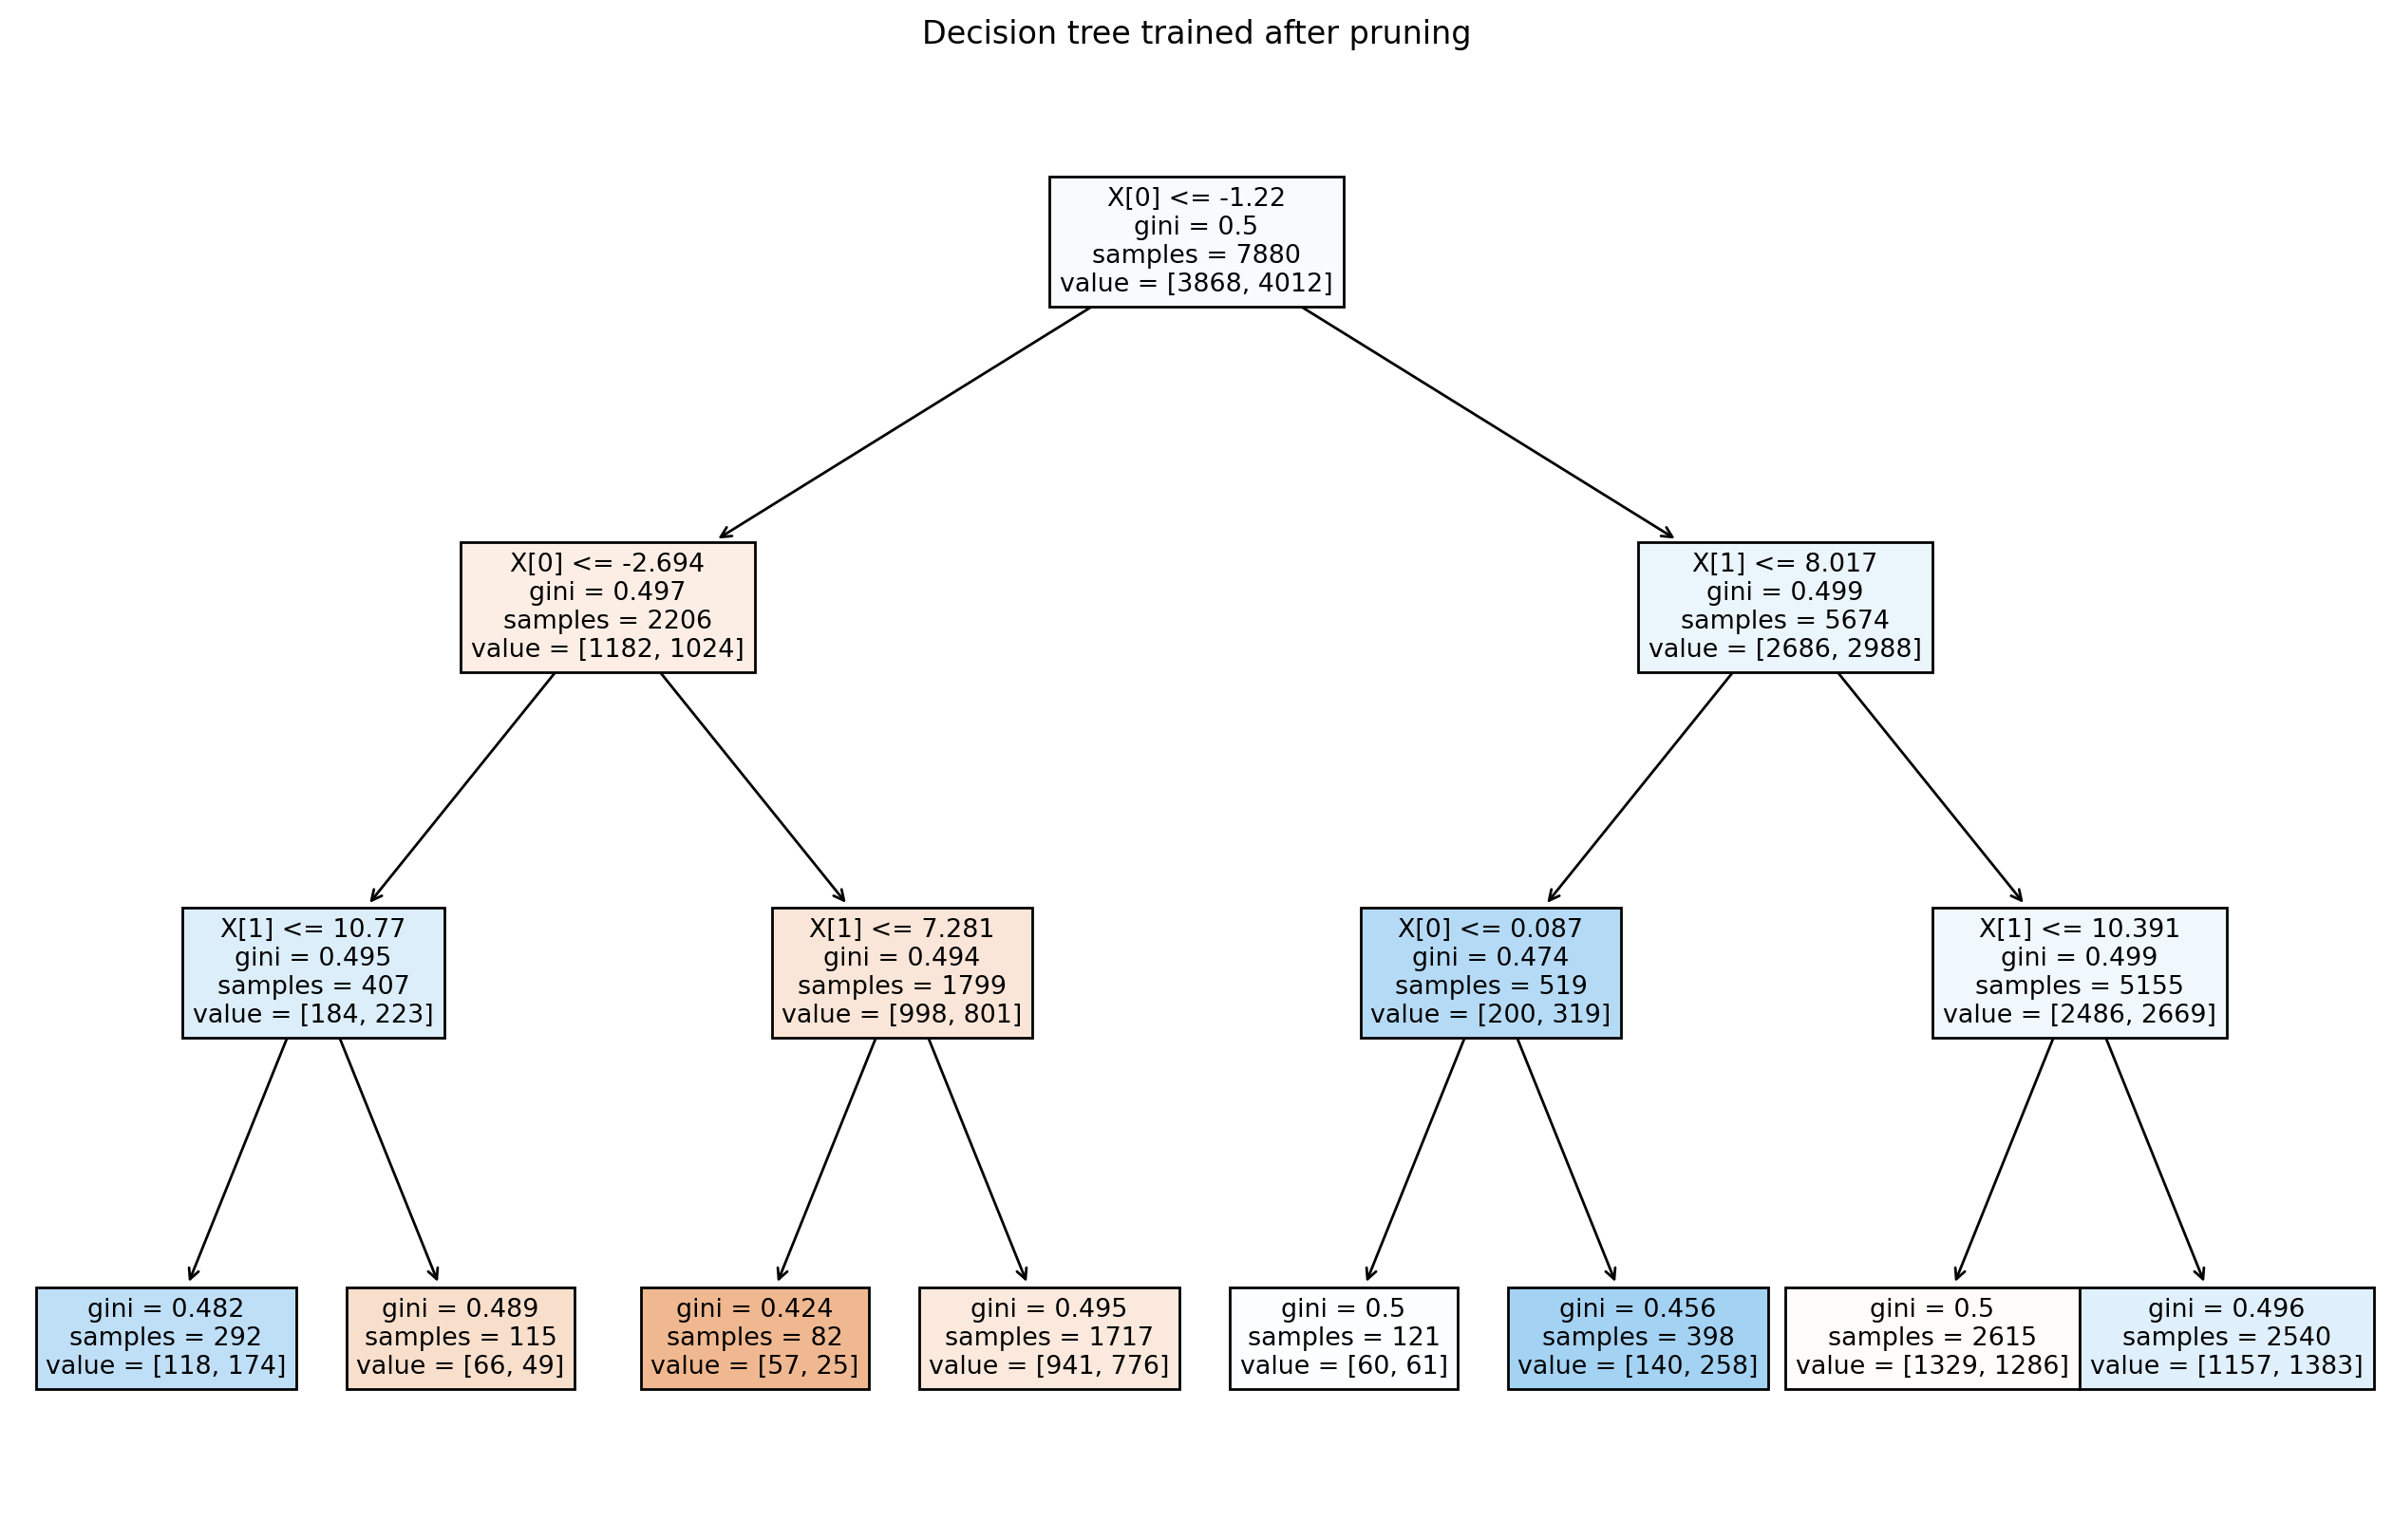

              precision    recall  f1-score   support

         100       0.54      0.11      0.18      4643
         200       0.53      0.91      0.67      5111

    accuracy                           0.53      9754
   macro avg       0.54      0.51      0.43      9754
weighted avg       0.54      0.53      0.44      9754



<Figure size 640x480 with 0 Axes>

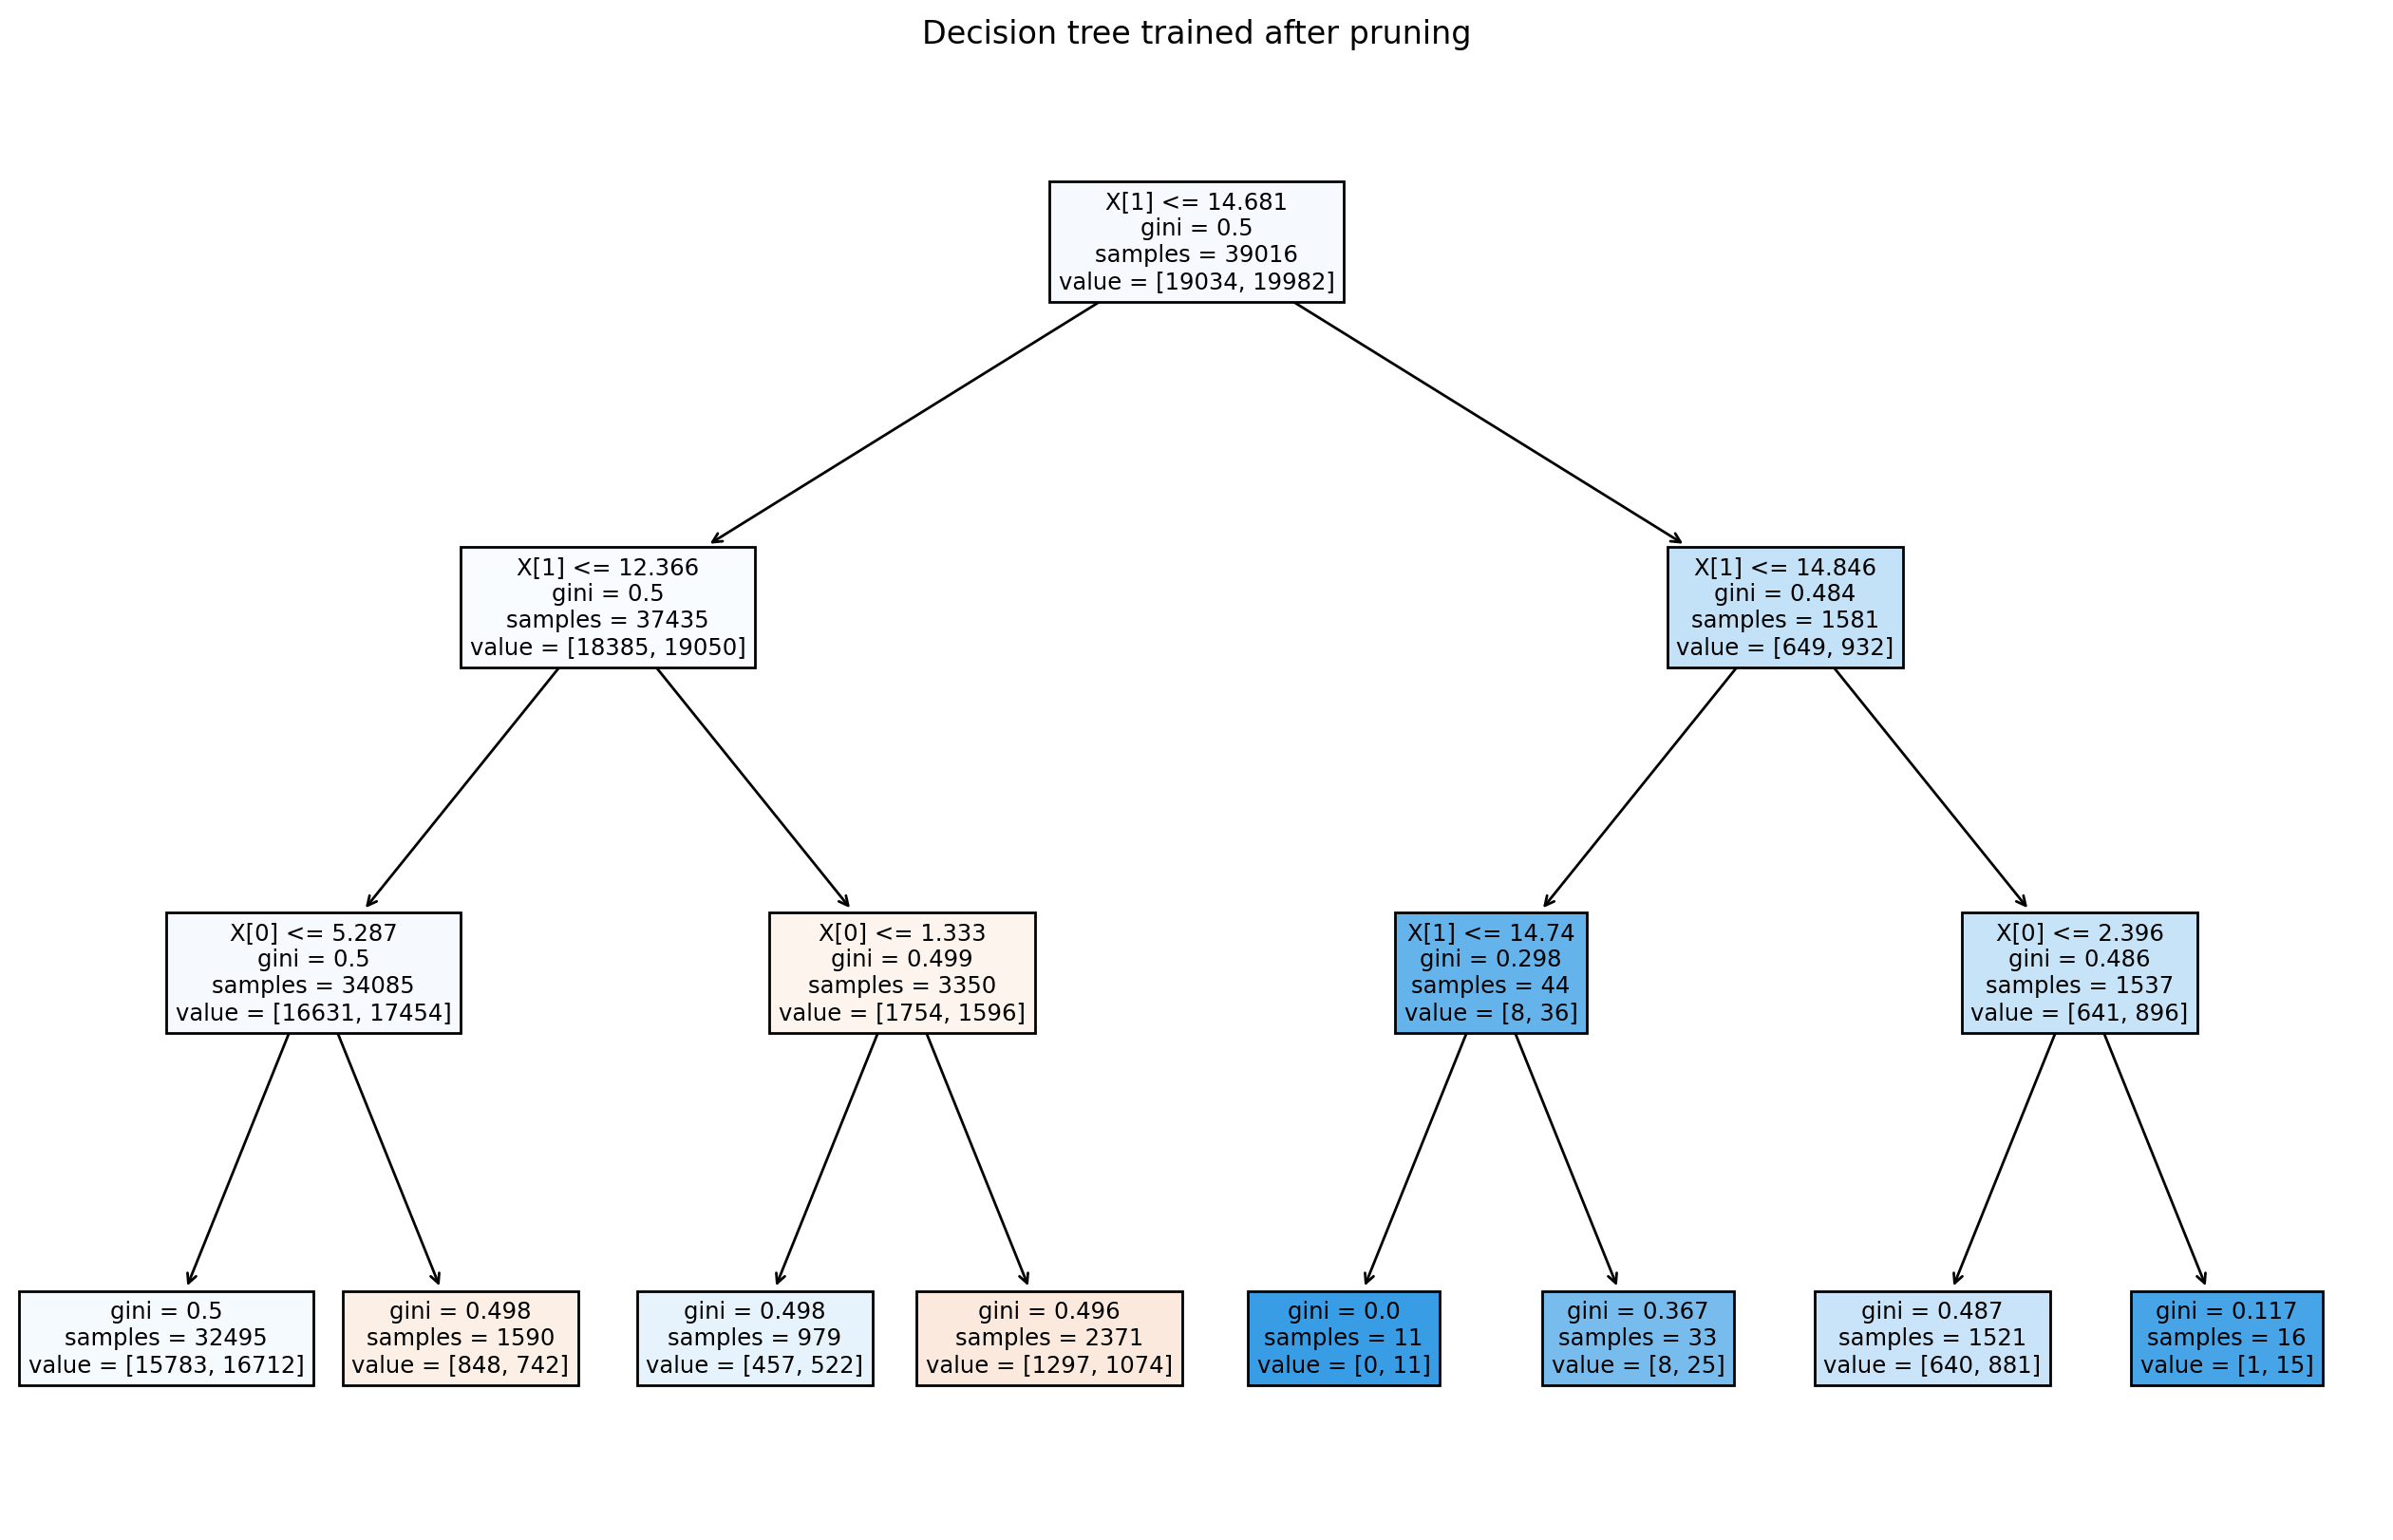

              precision    recall  f1-score   support

         100       0.42      0.00      0.01      2606
         200       0.52      1.00      0.68      2798

    accuracy                           0.52      5404
   macro avg       0.47      0.50      0.34      5404
weighted avg       0.47      0.52      0.36      5404



<Figure size 640x480 with 0 Axes>

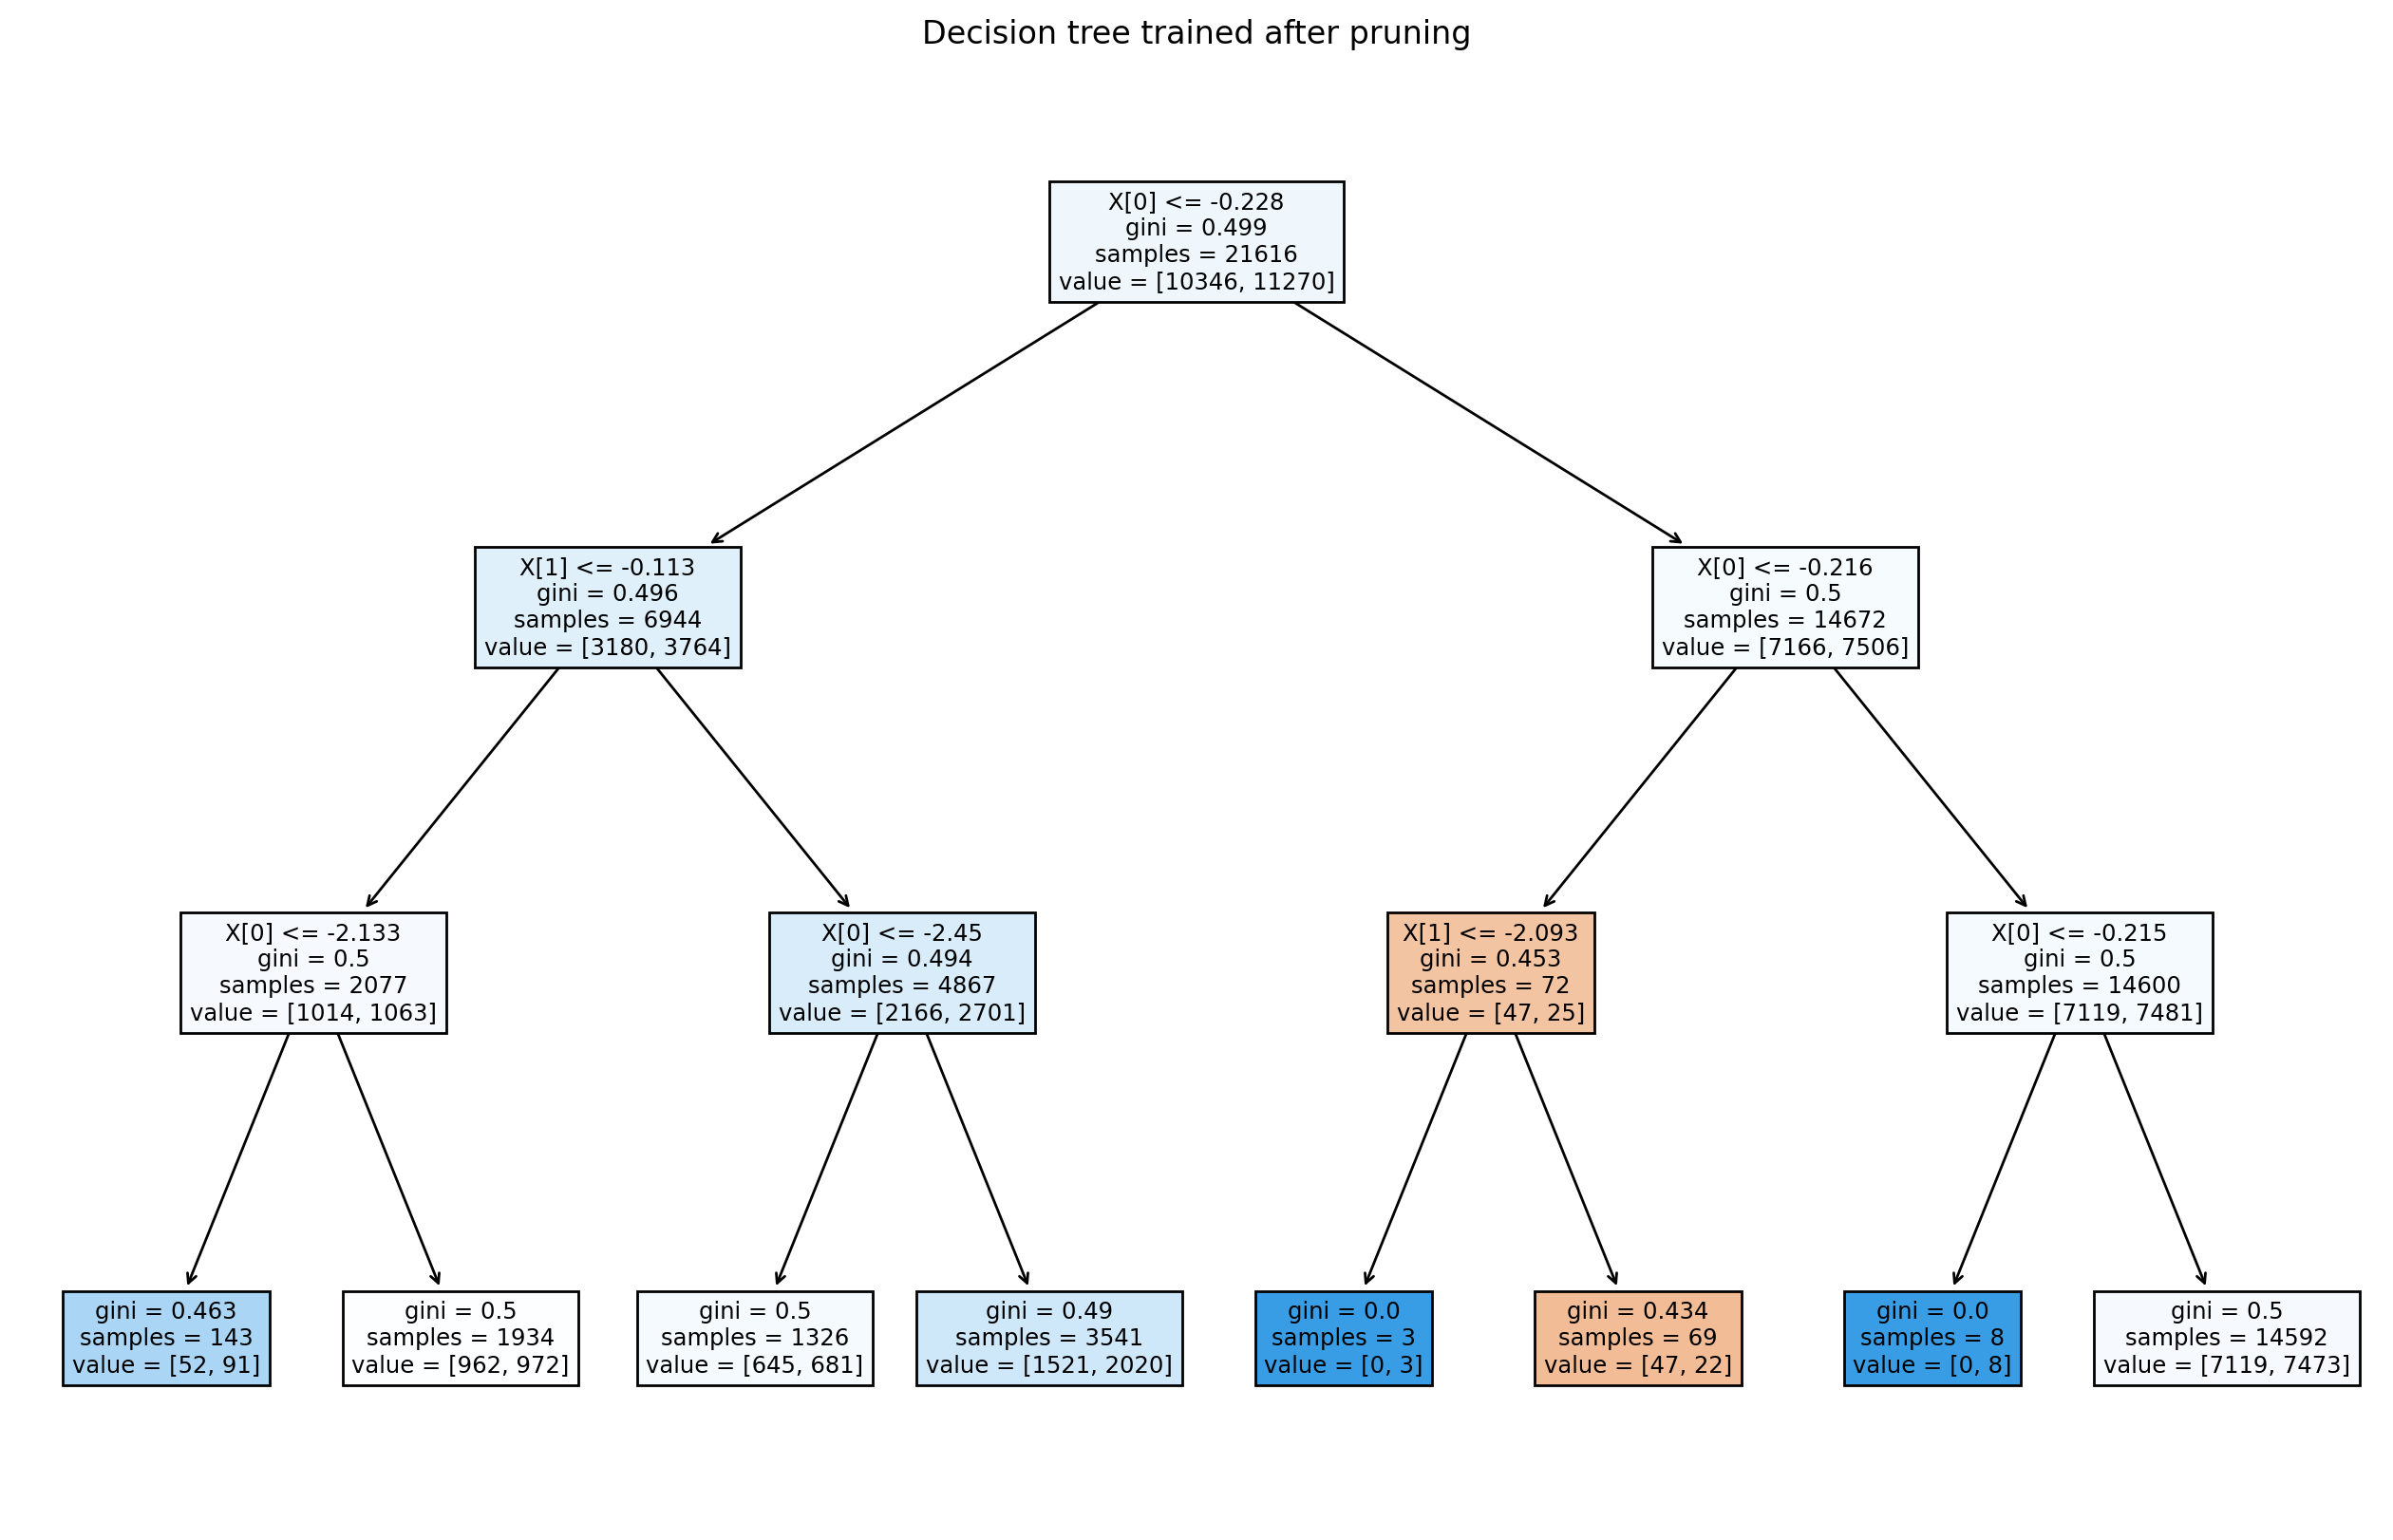

DecisionTreeClassifier(max_depth=3)

In [27]:
runModel_Umap(pre_all_gold, 3)
runModel_Umap(mid_all_gold, 3)
runModel_Umap(late_all_gold, 3)

In [13]:
# #Grid Search
# X_train, Y_train = mid.drop(['TeamVictory'],axis=1),mid[['TeamVictory']]
# #Creating a copy of data
# X_scale = X_train.copy()
# #Scaling
# scaler = StandardScaler()
# scaler.fit(X_scale)
# X_scale = pd.DataFrame(scaler.transform(X_scale),columns= X_scale.columns )
# train_X, test_X, train_Y, test_Y = train_test_split(X_scale, Y_train, test_size = 0.2, random_state = 0)

# param_grid = [
#         {
#             'max_depth' : range(1,20),
            
#         }
#        ]

# clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3,
#                            scoring='accuracy')
# clf.fit(train_X,train_Y)


# print("Best parameters set found on development set:")
# print(clf.best_params_)

              precision    recall  f1-score   support

         100       0.59      0.69      0.63       969
         200       0.64      0.53      0.58      1001

    accuracy                           0.61      1970
   macro avg       0.61      0.61      0.61      1970
weighted avg       0.61      0.61      0.61      1970



<Figure size 640x480 with 0 Axes>

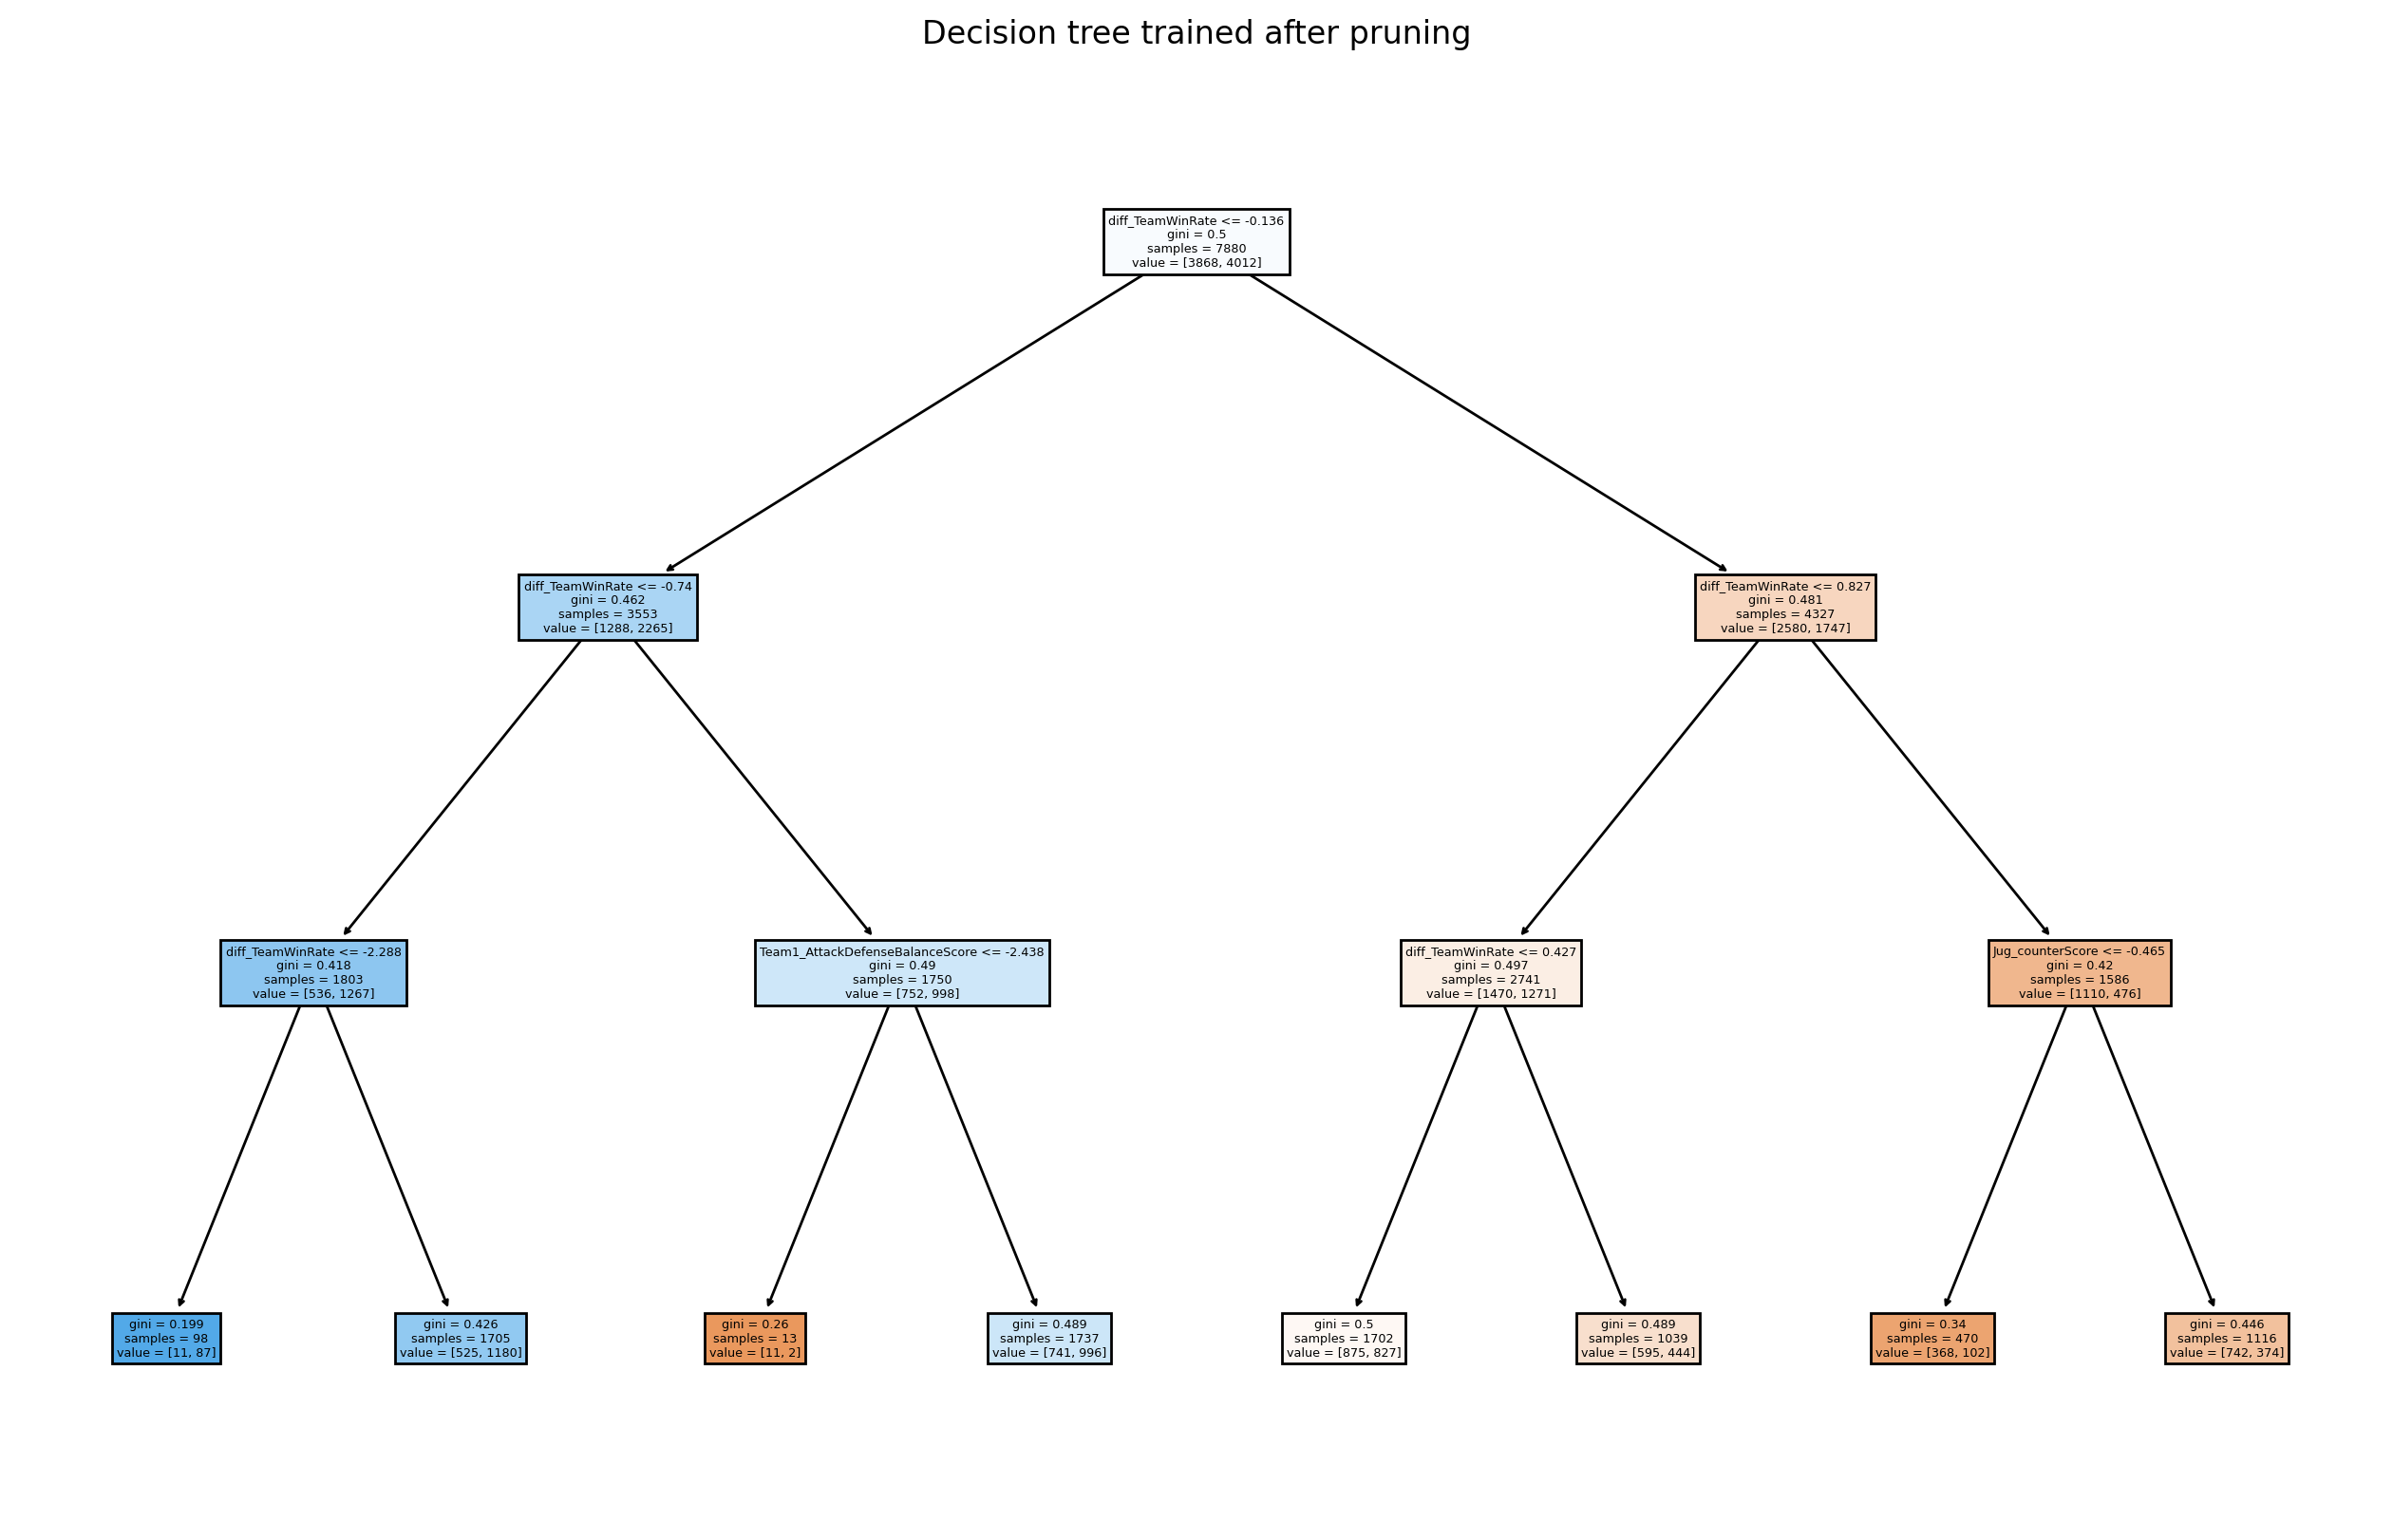

              precision    recall  f1-score   support

         100       0.54      0.60      0.57      4643
         200       0.59      0.53      0.56      5111

    accuracy                           0.56      9754
   macro avg       0.56      0.56      0.56      9754
weighted avg       0.57      0.56      0.56      9754



<Figure size 640x480 with 0 Axes>

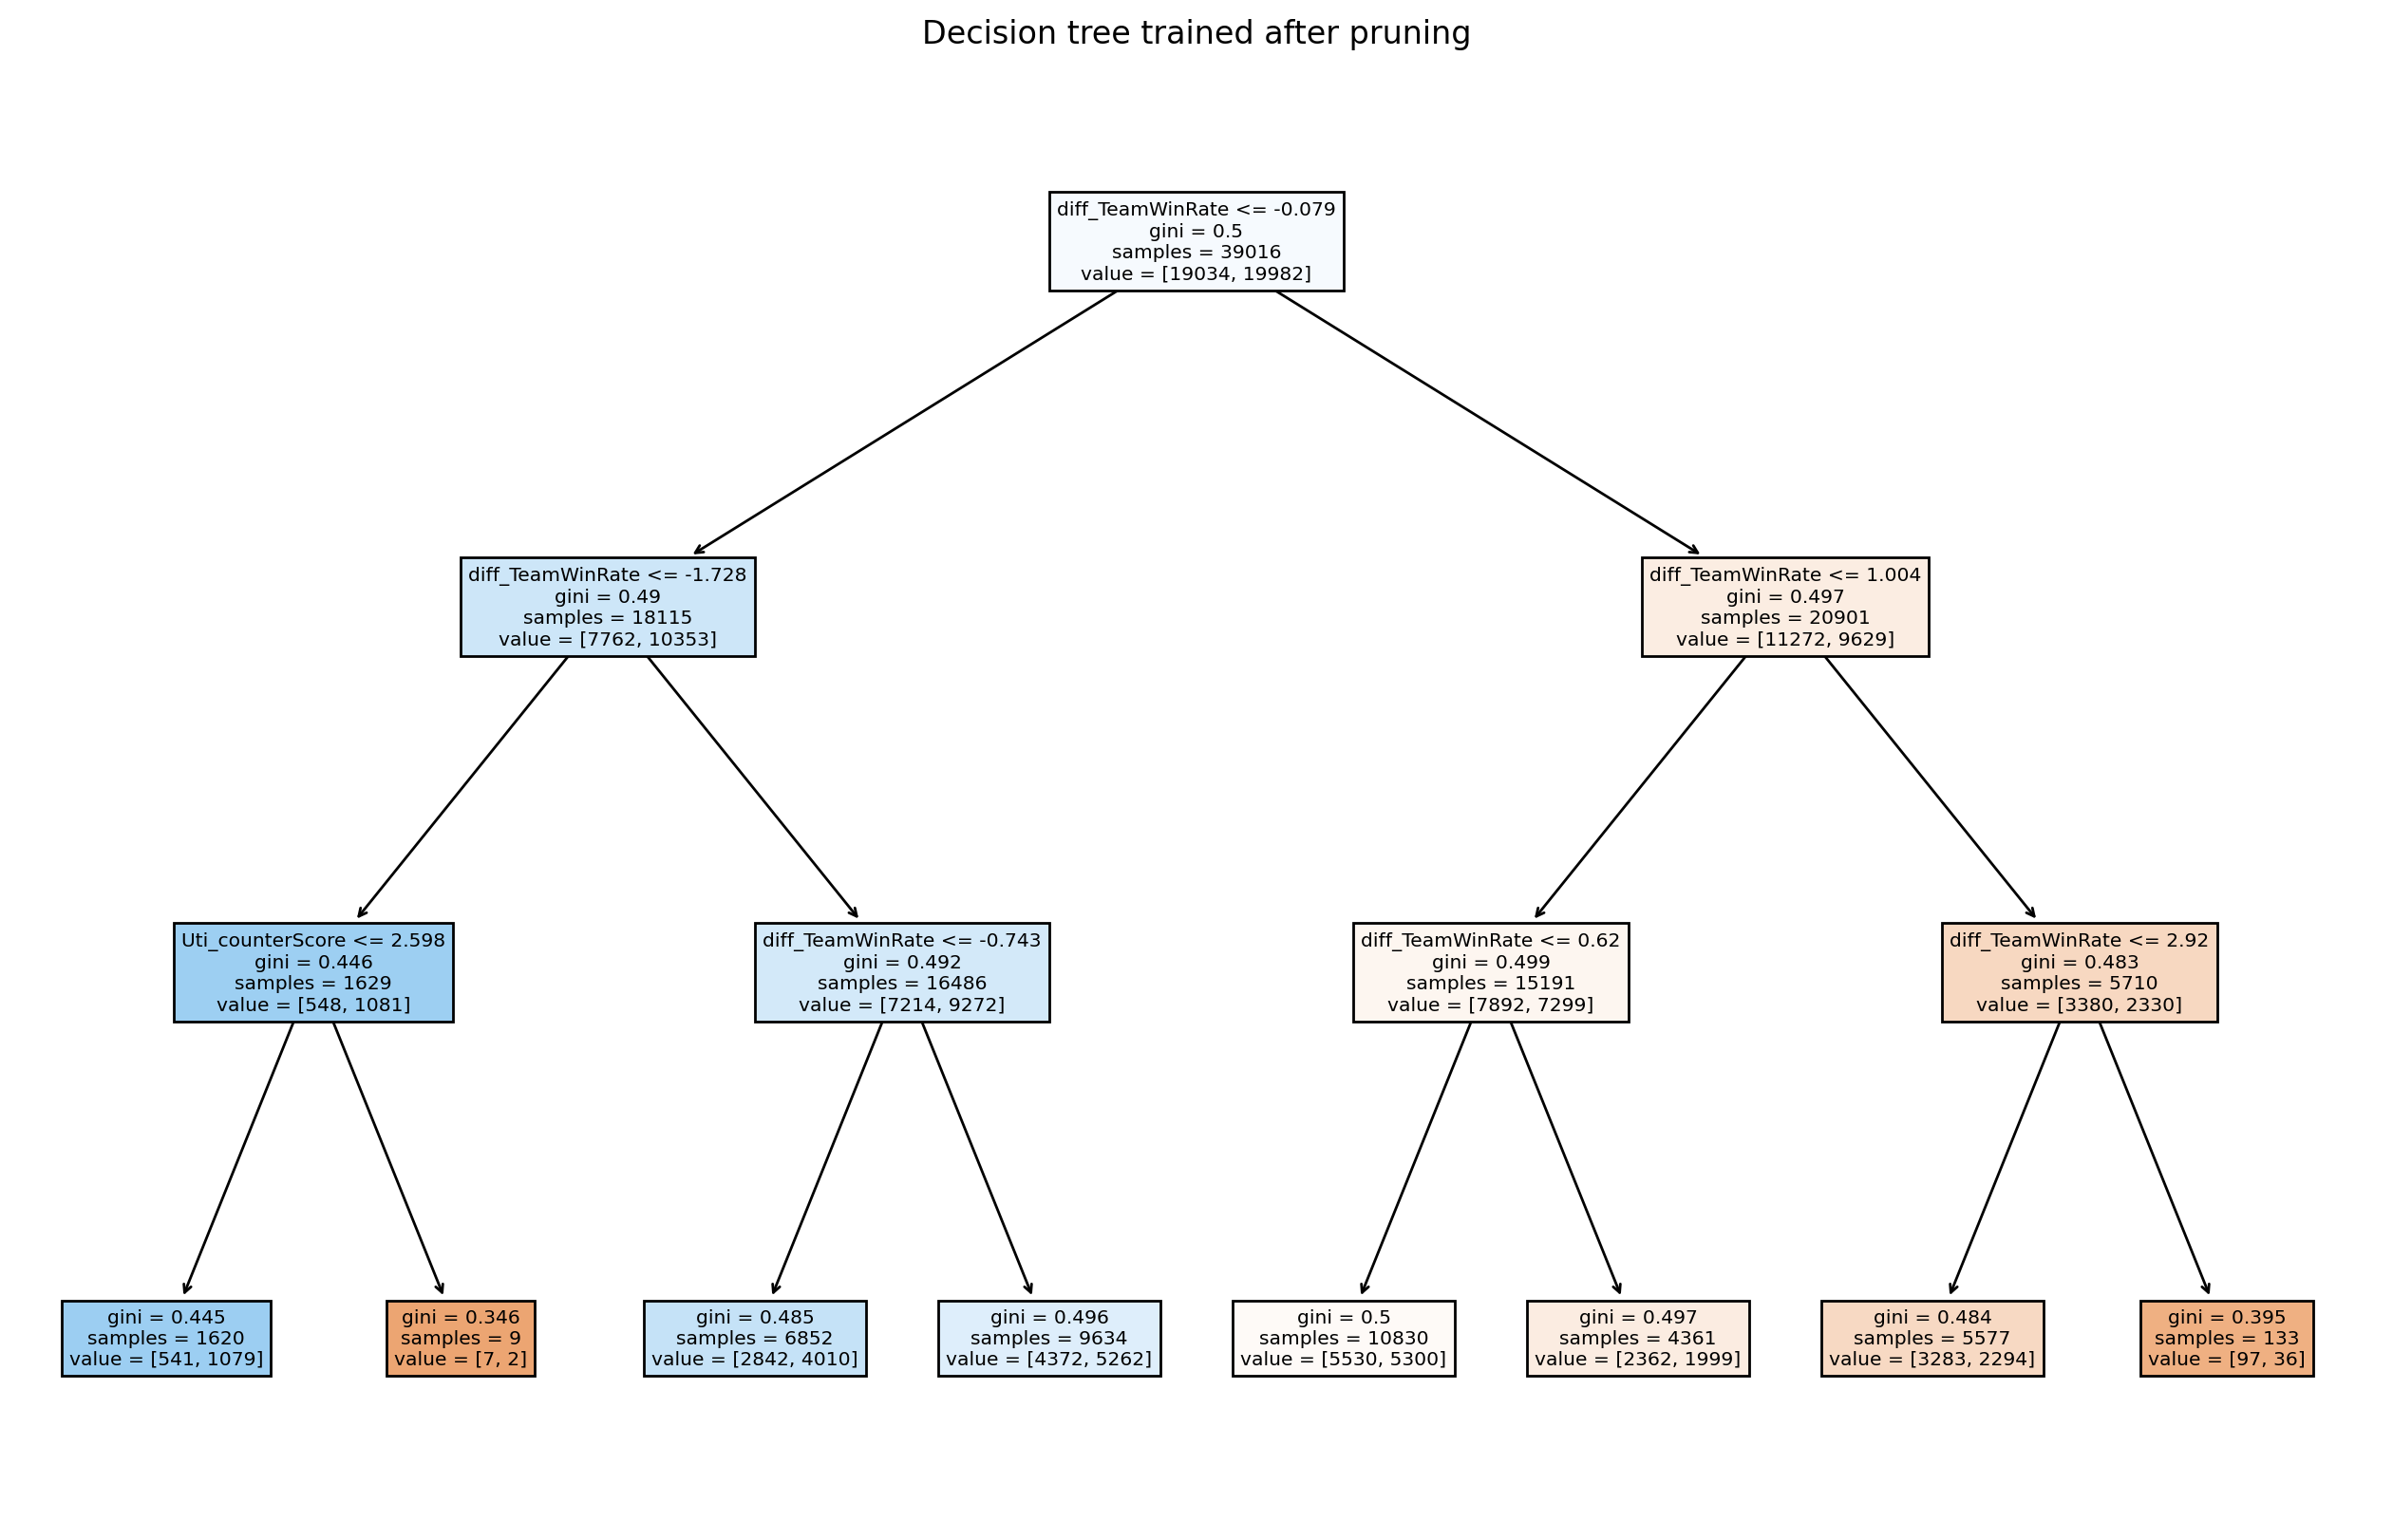

              precision    recall  f1-score   support

         100       0.53      0.55      0.54      2606
         200       0.56      0.54      0.55      2798

    accuracy                           0.55      5404
   macro avg       0.55      0.55      0.55      5404
weighted avg       0.55      0.55      0.55      5404



<Figure size 640x480 with 0 Axes>

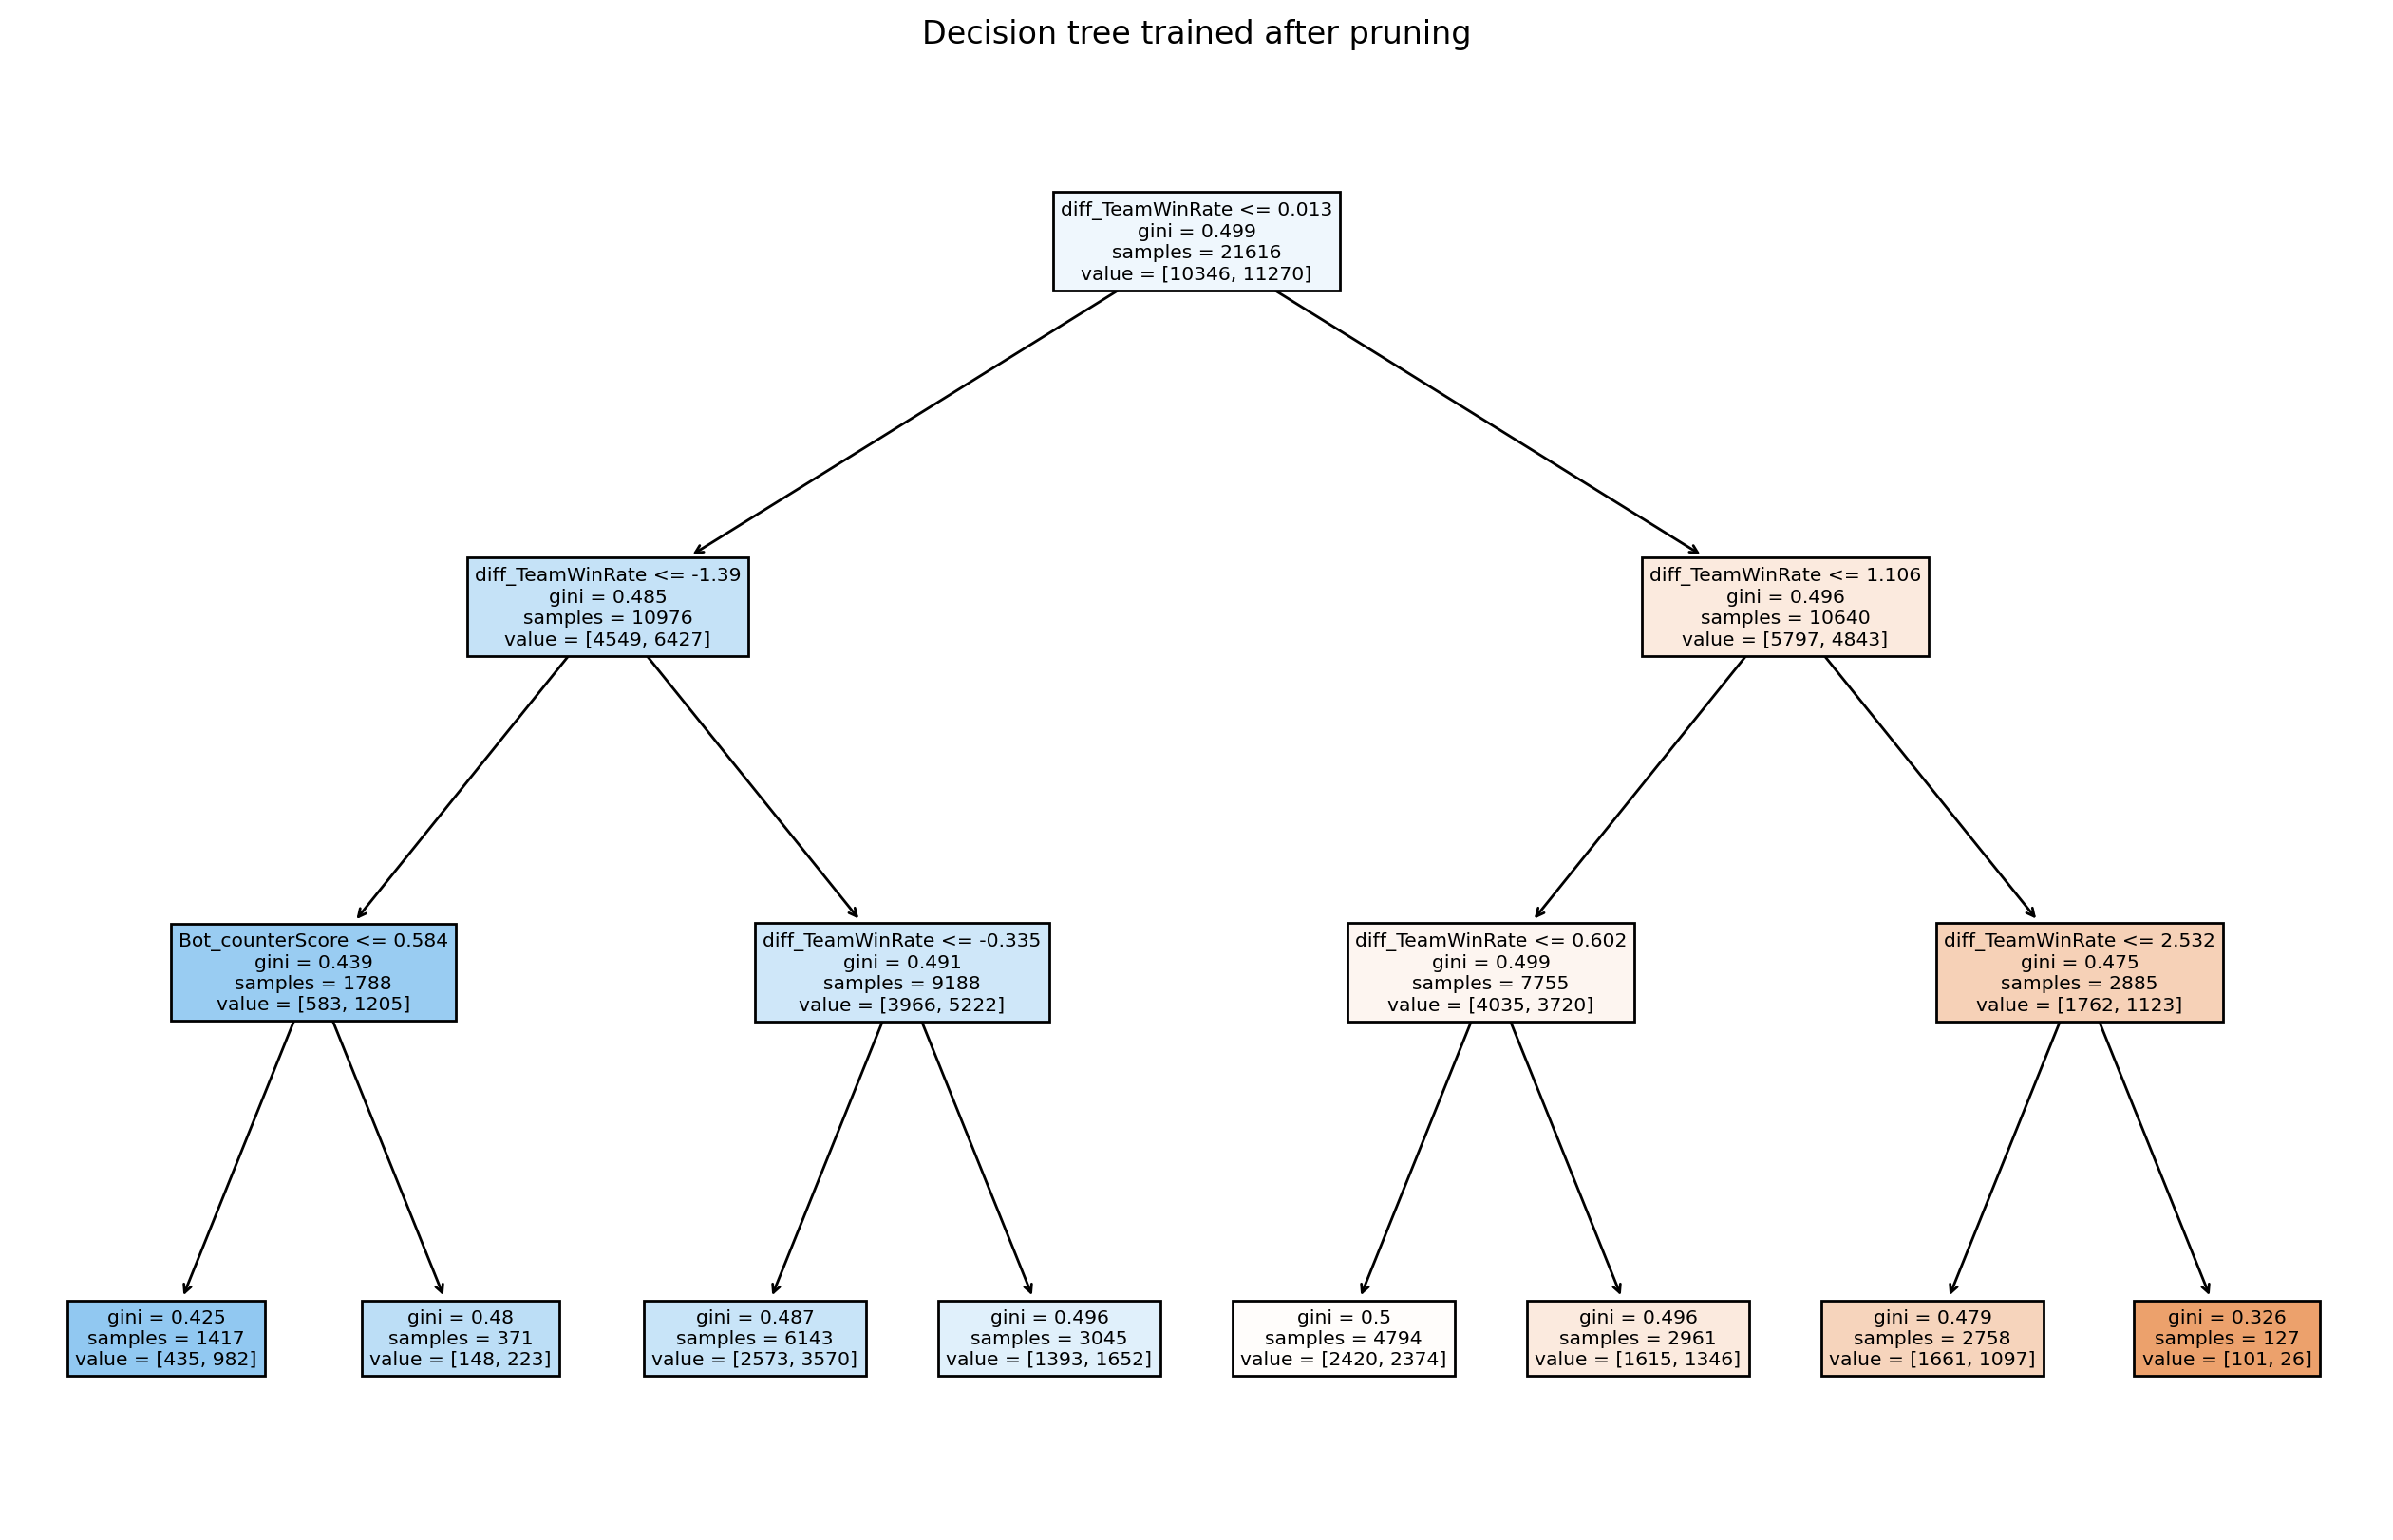

DecisionTreeClassifier(max_depth=3)

In [21]:
runModel(pre,3)
runModel(mid,3)
runModel(late,3)

In [6]:
# import time

# feature_names = [train_X.columns[range(0,11)]]
# start_time = time.time()
# importances = RDF.feature_importances_
# std = np.std([tree.feature_importances_ for tree in RDF.estimators_], axis=0)
# elapsed_time = time.time() - start_time
# forest_importances = pd.Series(importances, index=feature_names)

# fig, ax = plt.subplots()
# forest_importances.plot.bar(yerr=std, ax=ax)
# ax.set_title("Feature importances using MDI")
# ax.set_ylabel("Mean decrease in impurity")
# fig.tight_layout()

In [7]:
# DCT = DecisionTreeClassifier(max_depth=1)
# DCT.fit(train_X,train_Y)
# y_predict = DCT.predict(test_X)

# print(classification_report(y_true=test_Y,y_pred=y_predict))

# #plot the decision tree with unlimited max depth
# plt.figure()
# plt.figure(dpi=800,figsize=(8,5))
# plot_tree(DCT, filled=True,feature_names=list(train_X.columns))
# plt.title("Decision tree trained after pruning")
# plt.show()

In [5]:
pre_all

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,Team1_Top_attackScore,Team1_Jug_attackScore,Team1_Mid_attackScore,Team1_Bot_attackScore,Team1_Uti_attackScore,...,Team1_Jug_controlScore,Team1_Mid_controlScore,Team1_Bot_controlScore,Team1_Uti_controlScore,Team2_Top_controlScore,Team2_Jug_controlScore,Team2_Mid_controlScore,Team2_Bot_controlScore,Team2_Uti_controlScore,TeamVictory
0,-569.769231,-8.500000,-1597.315789,-1921.459091,1425.714286,395.45,502.65,516.89,505.64,171.68,...,0.1449,0.7271,0.1244,1.6476,1.3279,0.5369,1.5233,0.4960,1.1193,100
1,-662.225806,-1107.869565,0.000000,-58.440000,-139.457143,395.45,459.23,489.64,501.32,220.24,...,1.0993,0.6922,0.5861,0.9627,0.3488,0.5082,0.9887,1.0497,1.3264,200
2,-714.315789,-423.875000,-472.241379,-1921.459091,-464.000000,458.45,431.20,558.91,505.64,251.09,...,0.6905,0.9280,0.1244,0.4650,0.6737,0.2930,1.0993,0.4960,0.9728,200
3,-455.454545,-472.074074,608.932432,-2338.644444,410.300000,488.24,479.37,460.00,505.64,243.59,...,0.3422,0.7818,0.1244,0.9590,0.6922,0.1449,0.7271,0.3441,1.2132,200
4,640.684211,-1075.000000,-420.983607,-597.052830,-301.200000,410.39,433.31,558.91,449.29,209.71,...,0.7891,0.9280,0.0913,1.2612,0.3157,0.7876,0.0833,0.1244,1.3264,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,-370.222222,0.000000,0.000000,1099.854167,367.823529,508.10,487.12,558.91,612.05,242.87,...,1.3279,0.9280,0.3441,1.3264,0.6772,0.5989,0.8596,0.0862,1.9354,100
9846,0.000000,-154.949495,1621.933333,860.736842,1960.100000,410.39,384.91,408.34,505.64,474.82,...,0.5082,0.8100,0.1244,0.9556,0.8095,0.5652,1.0993,0.3548,0.8990,100
9847,0.000000,138.190476,-207.529412,0.000000,-1324.254717,520.69,396.17,487.80,384.33,450.75,...,0.5652,1.5233,1.0810,1.0387,0.2073,0.6875,0.7717,0.0913,1.9354,200
9848,-311.636364,0.000000,0.000000,-83.076923,135.727891,497.03,458.17,477.52,489.90,239.92,...,0.3048,0.2269,0.5384,0.6237,0.2196,1.1045,0.5021,0.0913,0.9627,200


              precision    recall  f1-score   support

         100       0.55      0.67      0.60       969
         200       0.59      0.46      0.52      1001

    accuracy                           0.56      1970
   macro avg       0.57      0.57      0.56      1970
weighted avg       0.57      0.56      0.56      1970



<Figure size 640x480 with 0 Axes>

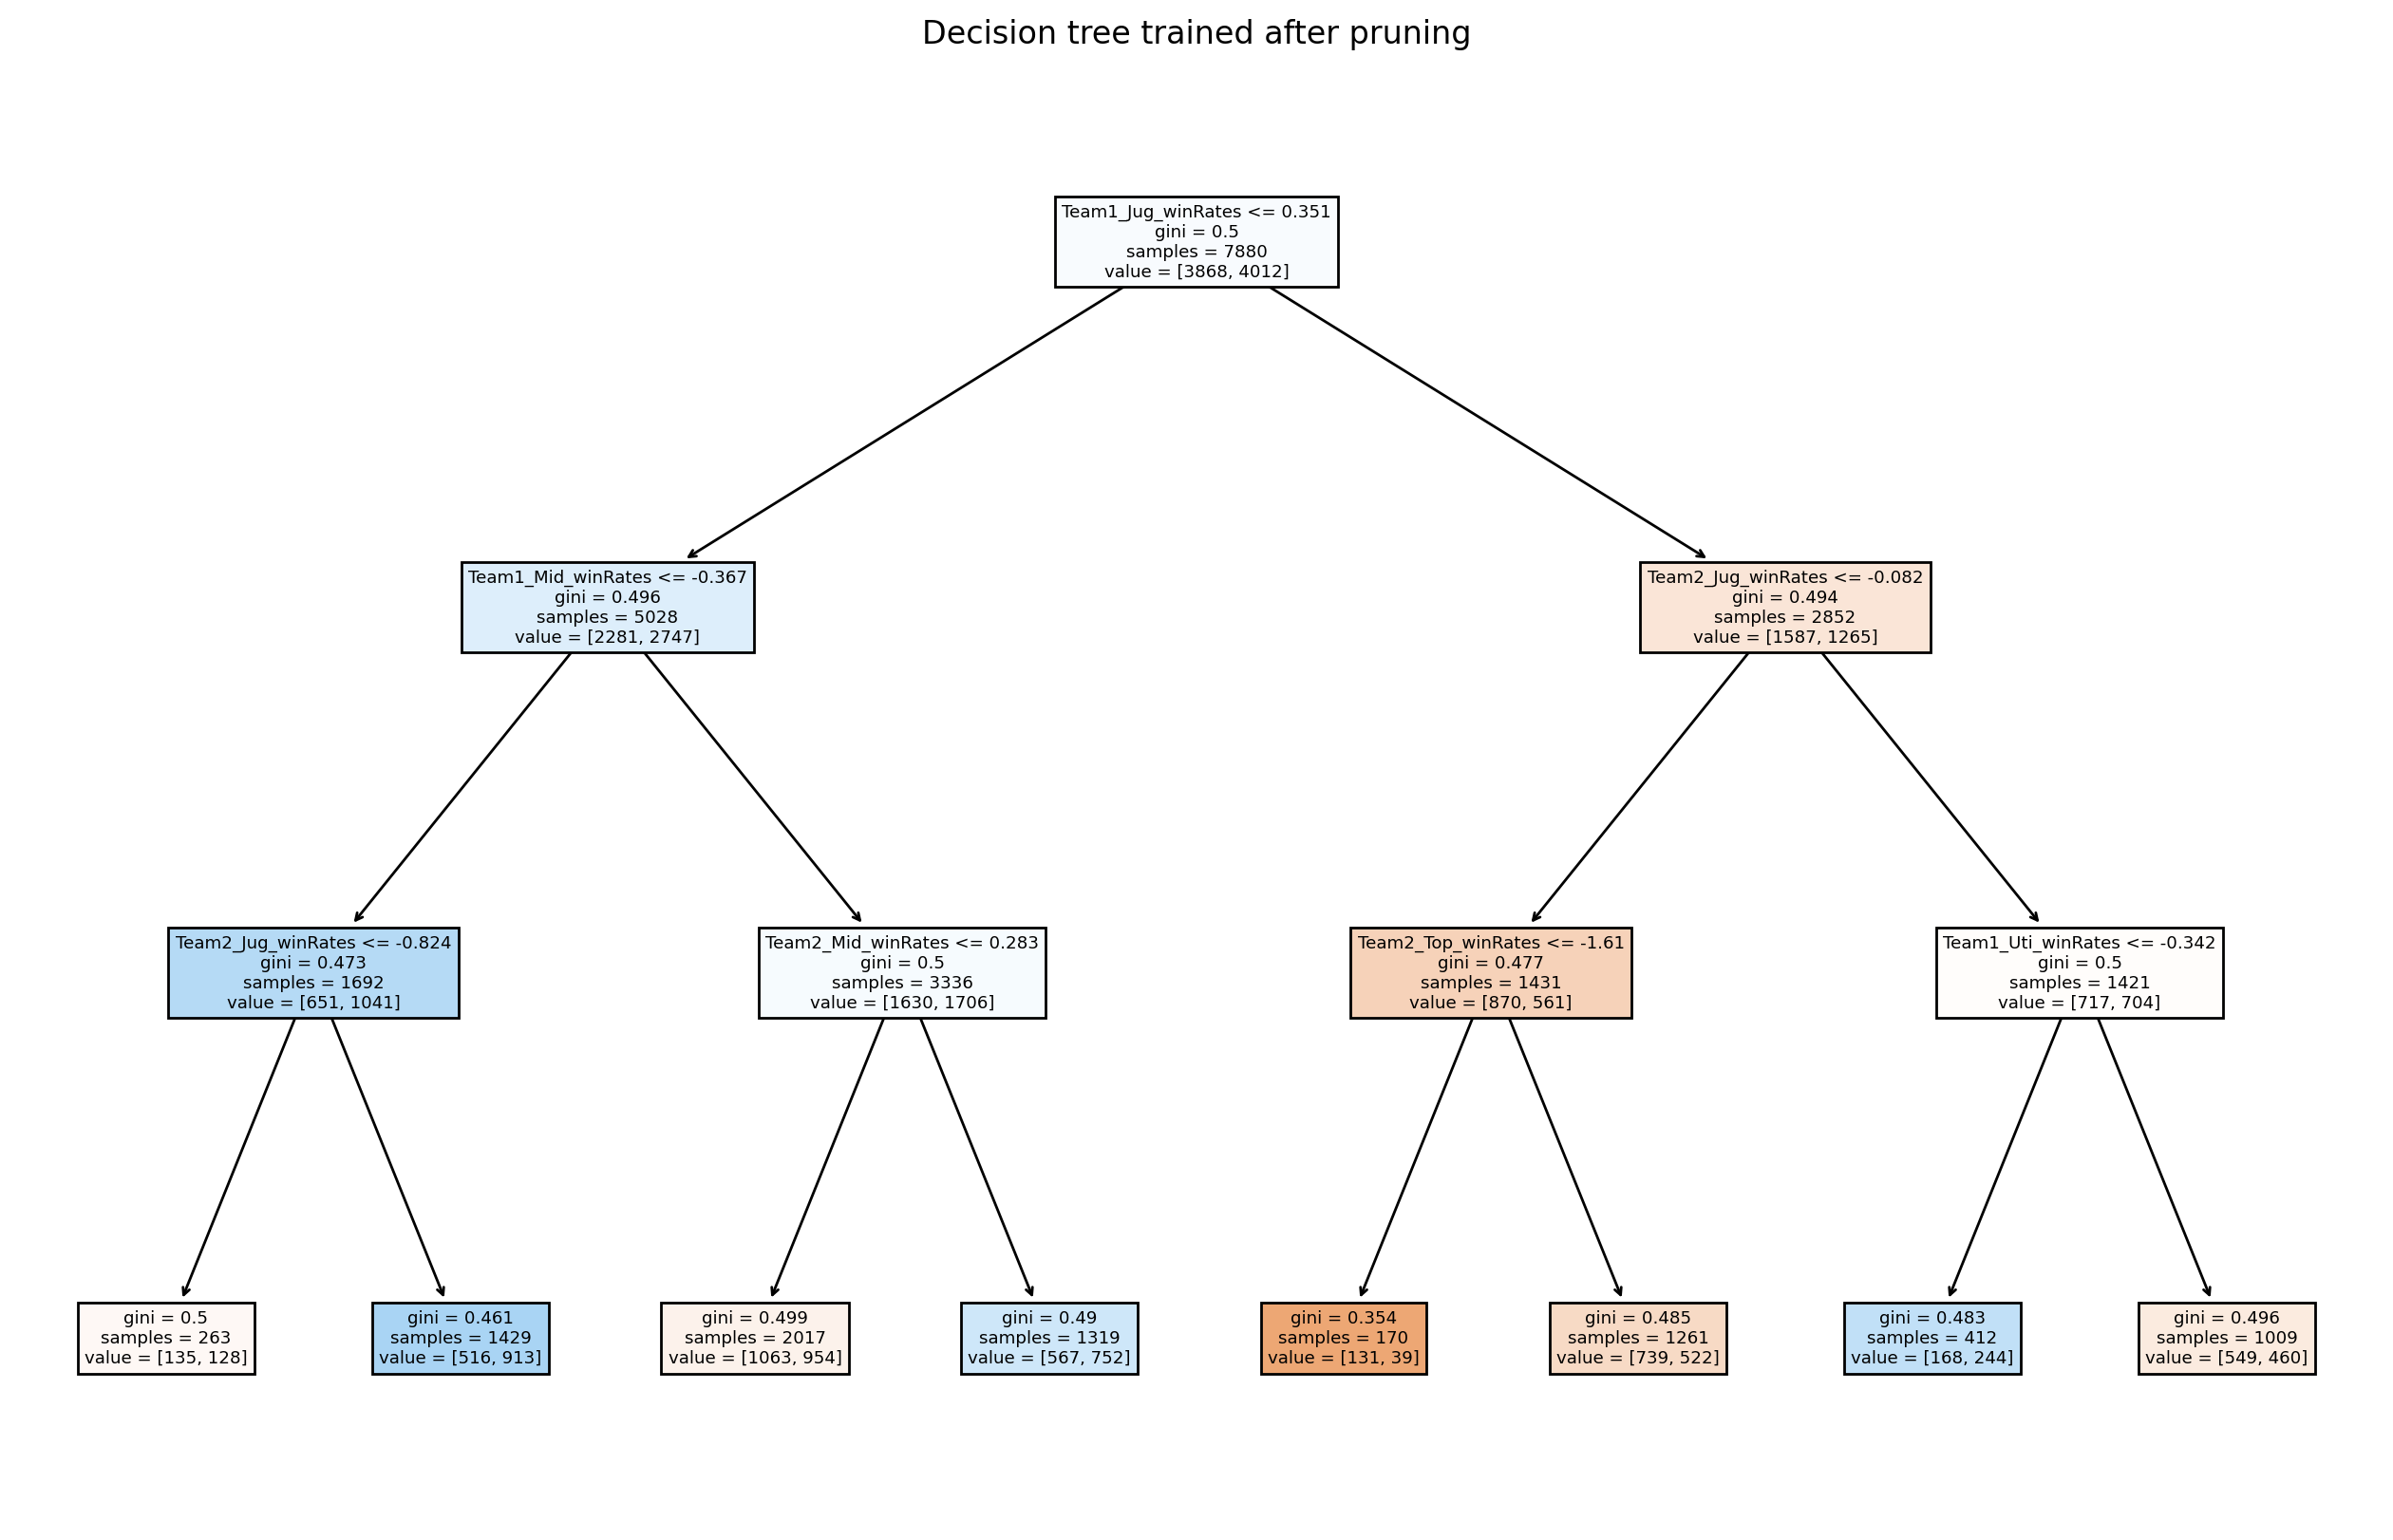

              precision    recall  f1-score   support

         100       0.51      0.52      0.52      4643
         200       0.56      0.56      0.56      5111

    accuracy                           0.54      9754
   macro avg       0.54      0.54      0.54      9754
weighted avg       0.54      0.54      0.54      9754



<Figure size 640x480 with 0 Axes>

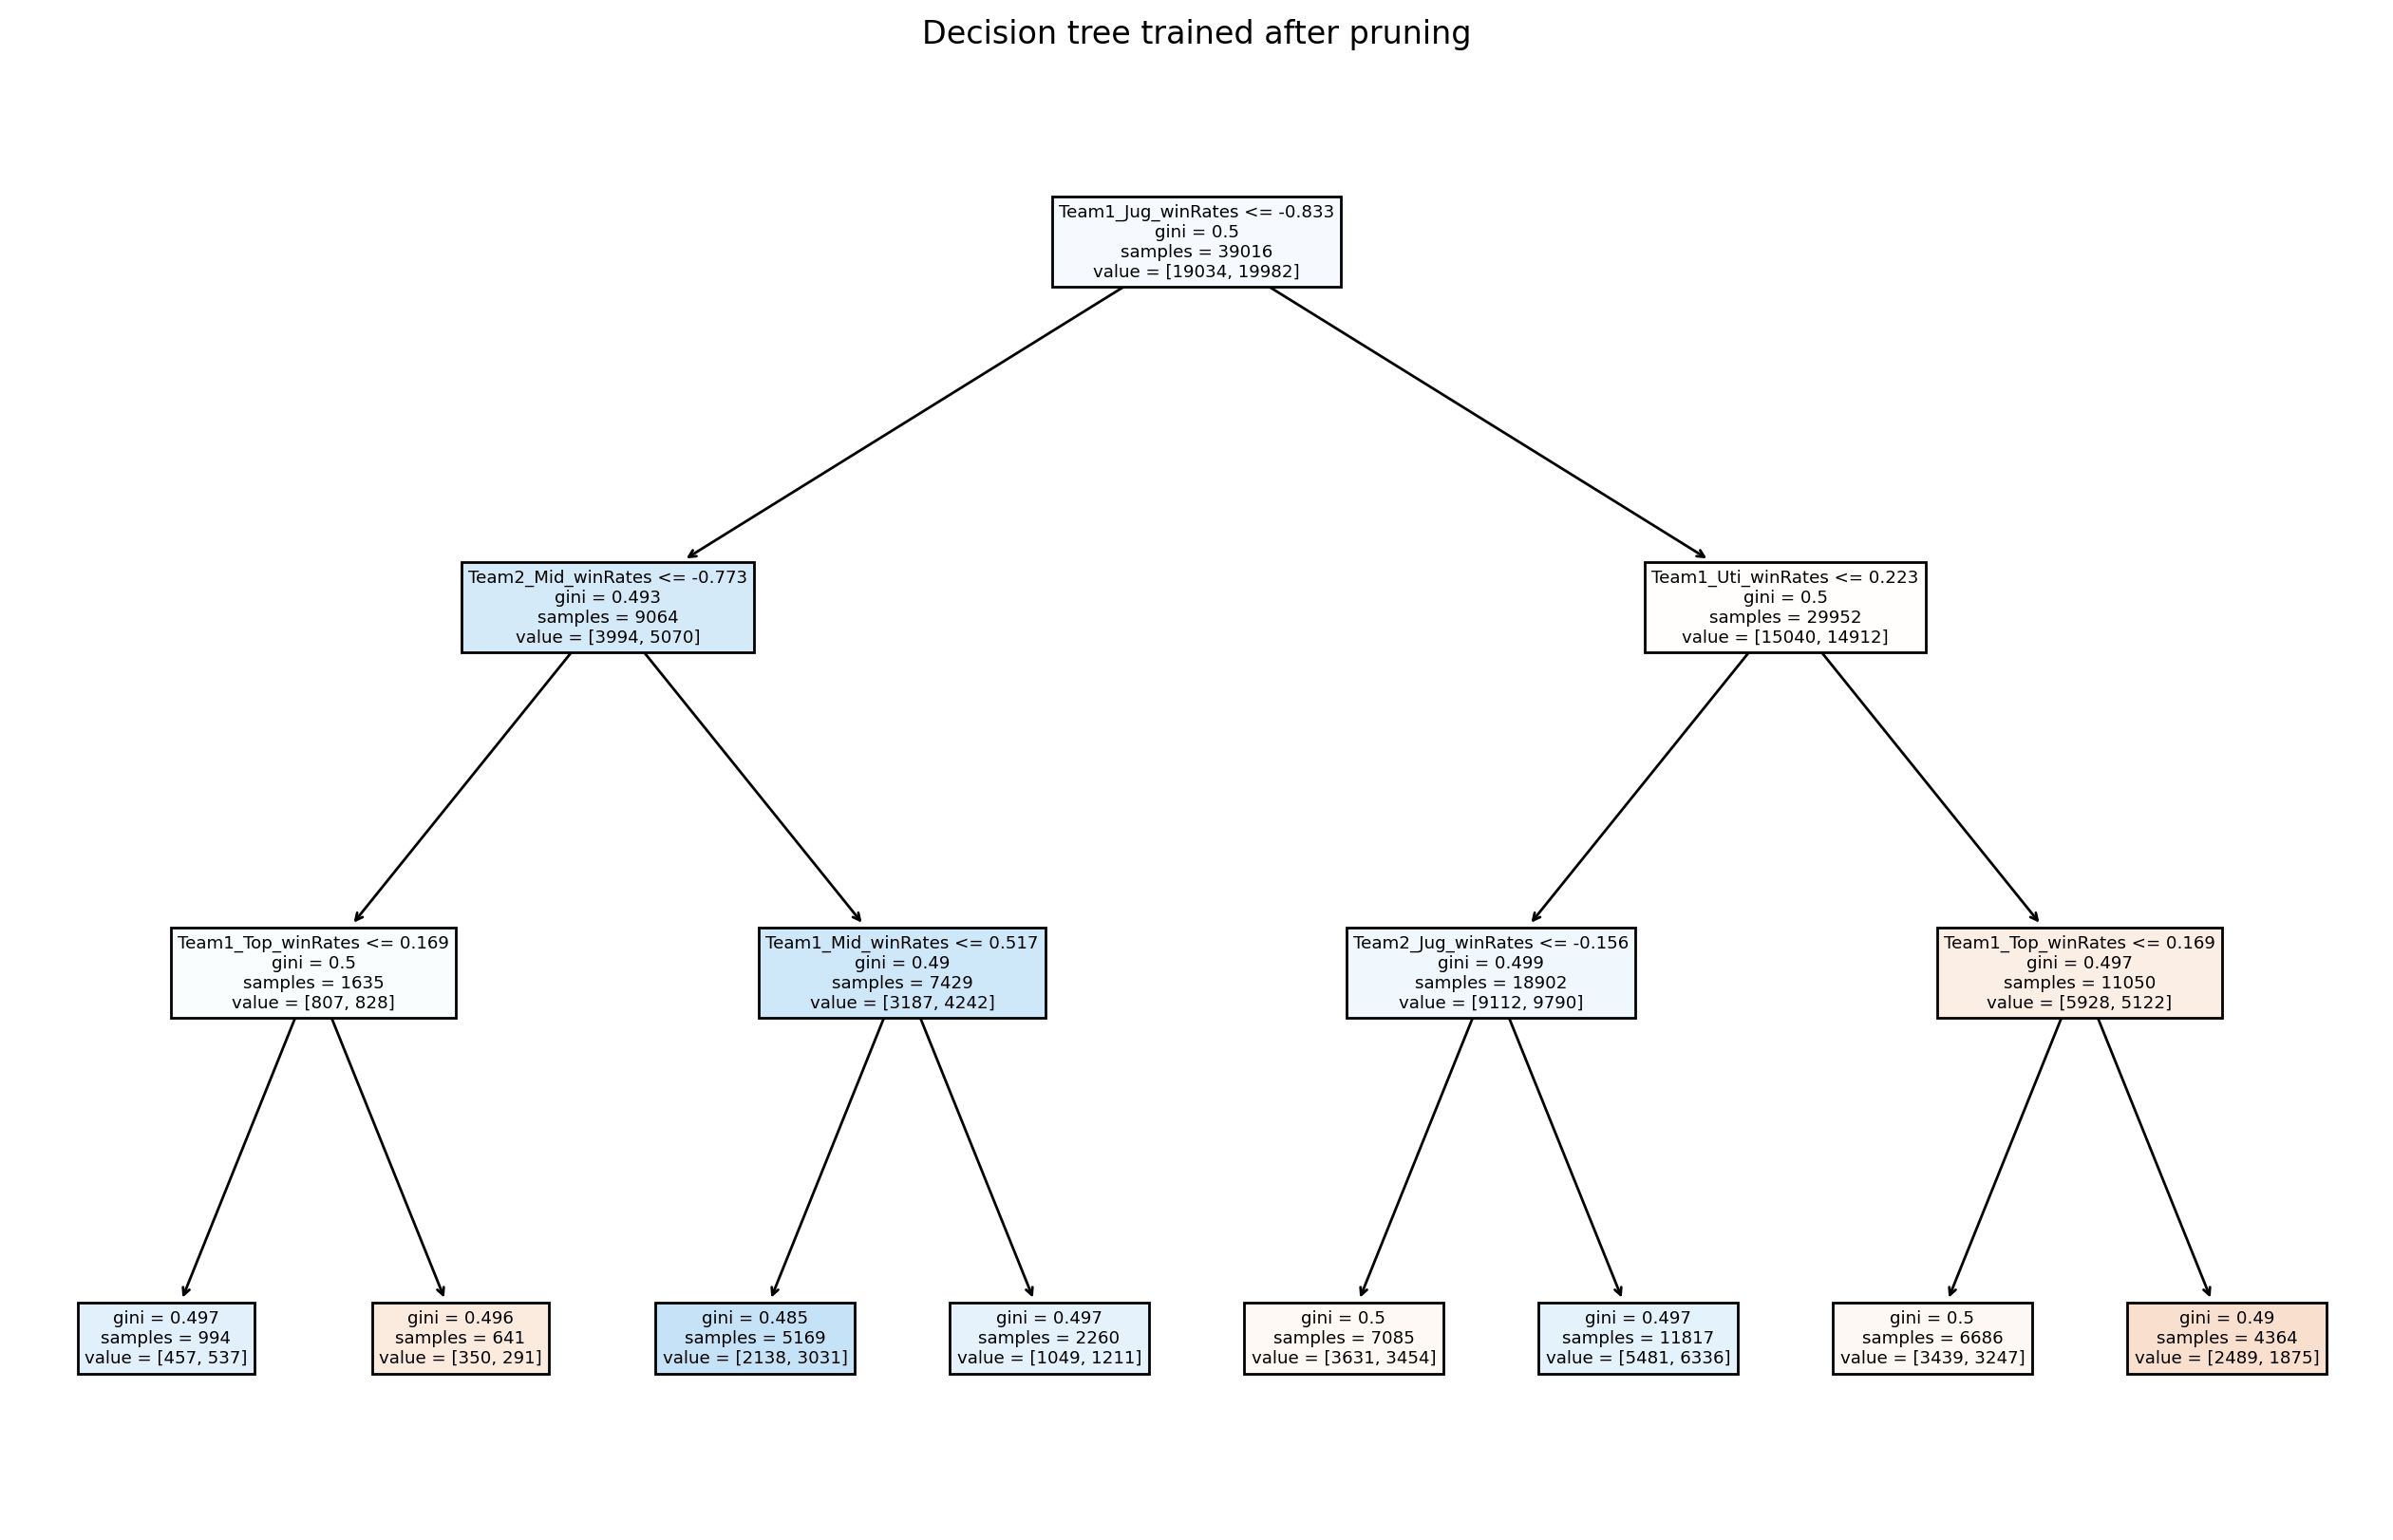

              precision    recall  f1-score   support

         100       0.51      0.27      0.35      2606
         200       0.53      0.76      0.62      2798

    accuracy                           0.52      5404
   macro avg       0.52      0.51      0.49      5404
weighted avg       0.52      0.52      0.49      5404



<Figure size 640x480 with 0 Axes>

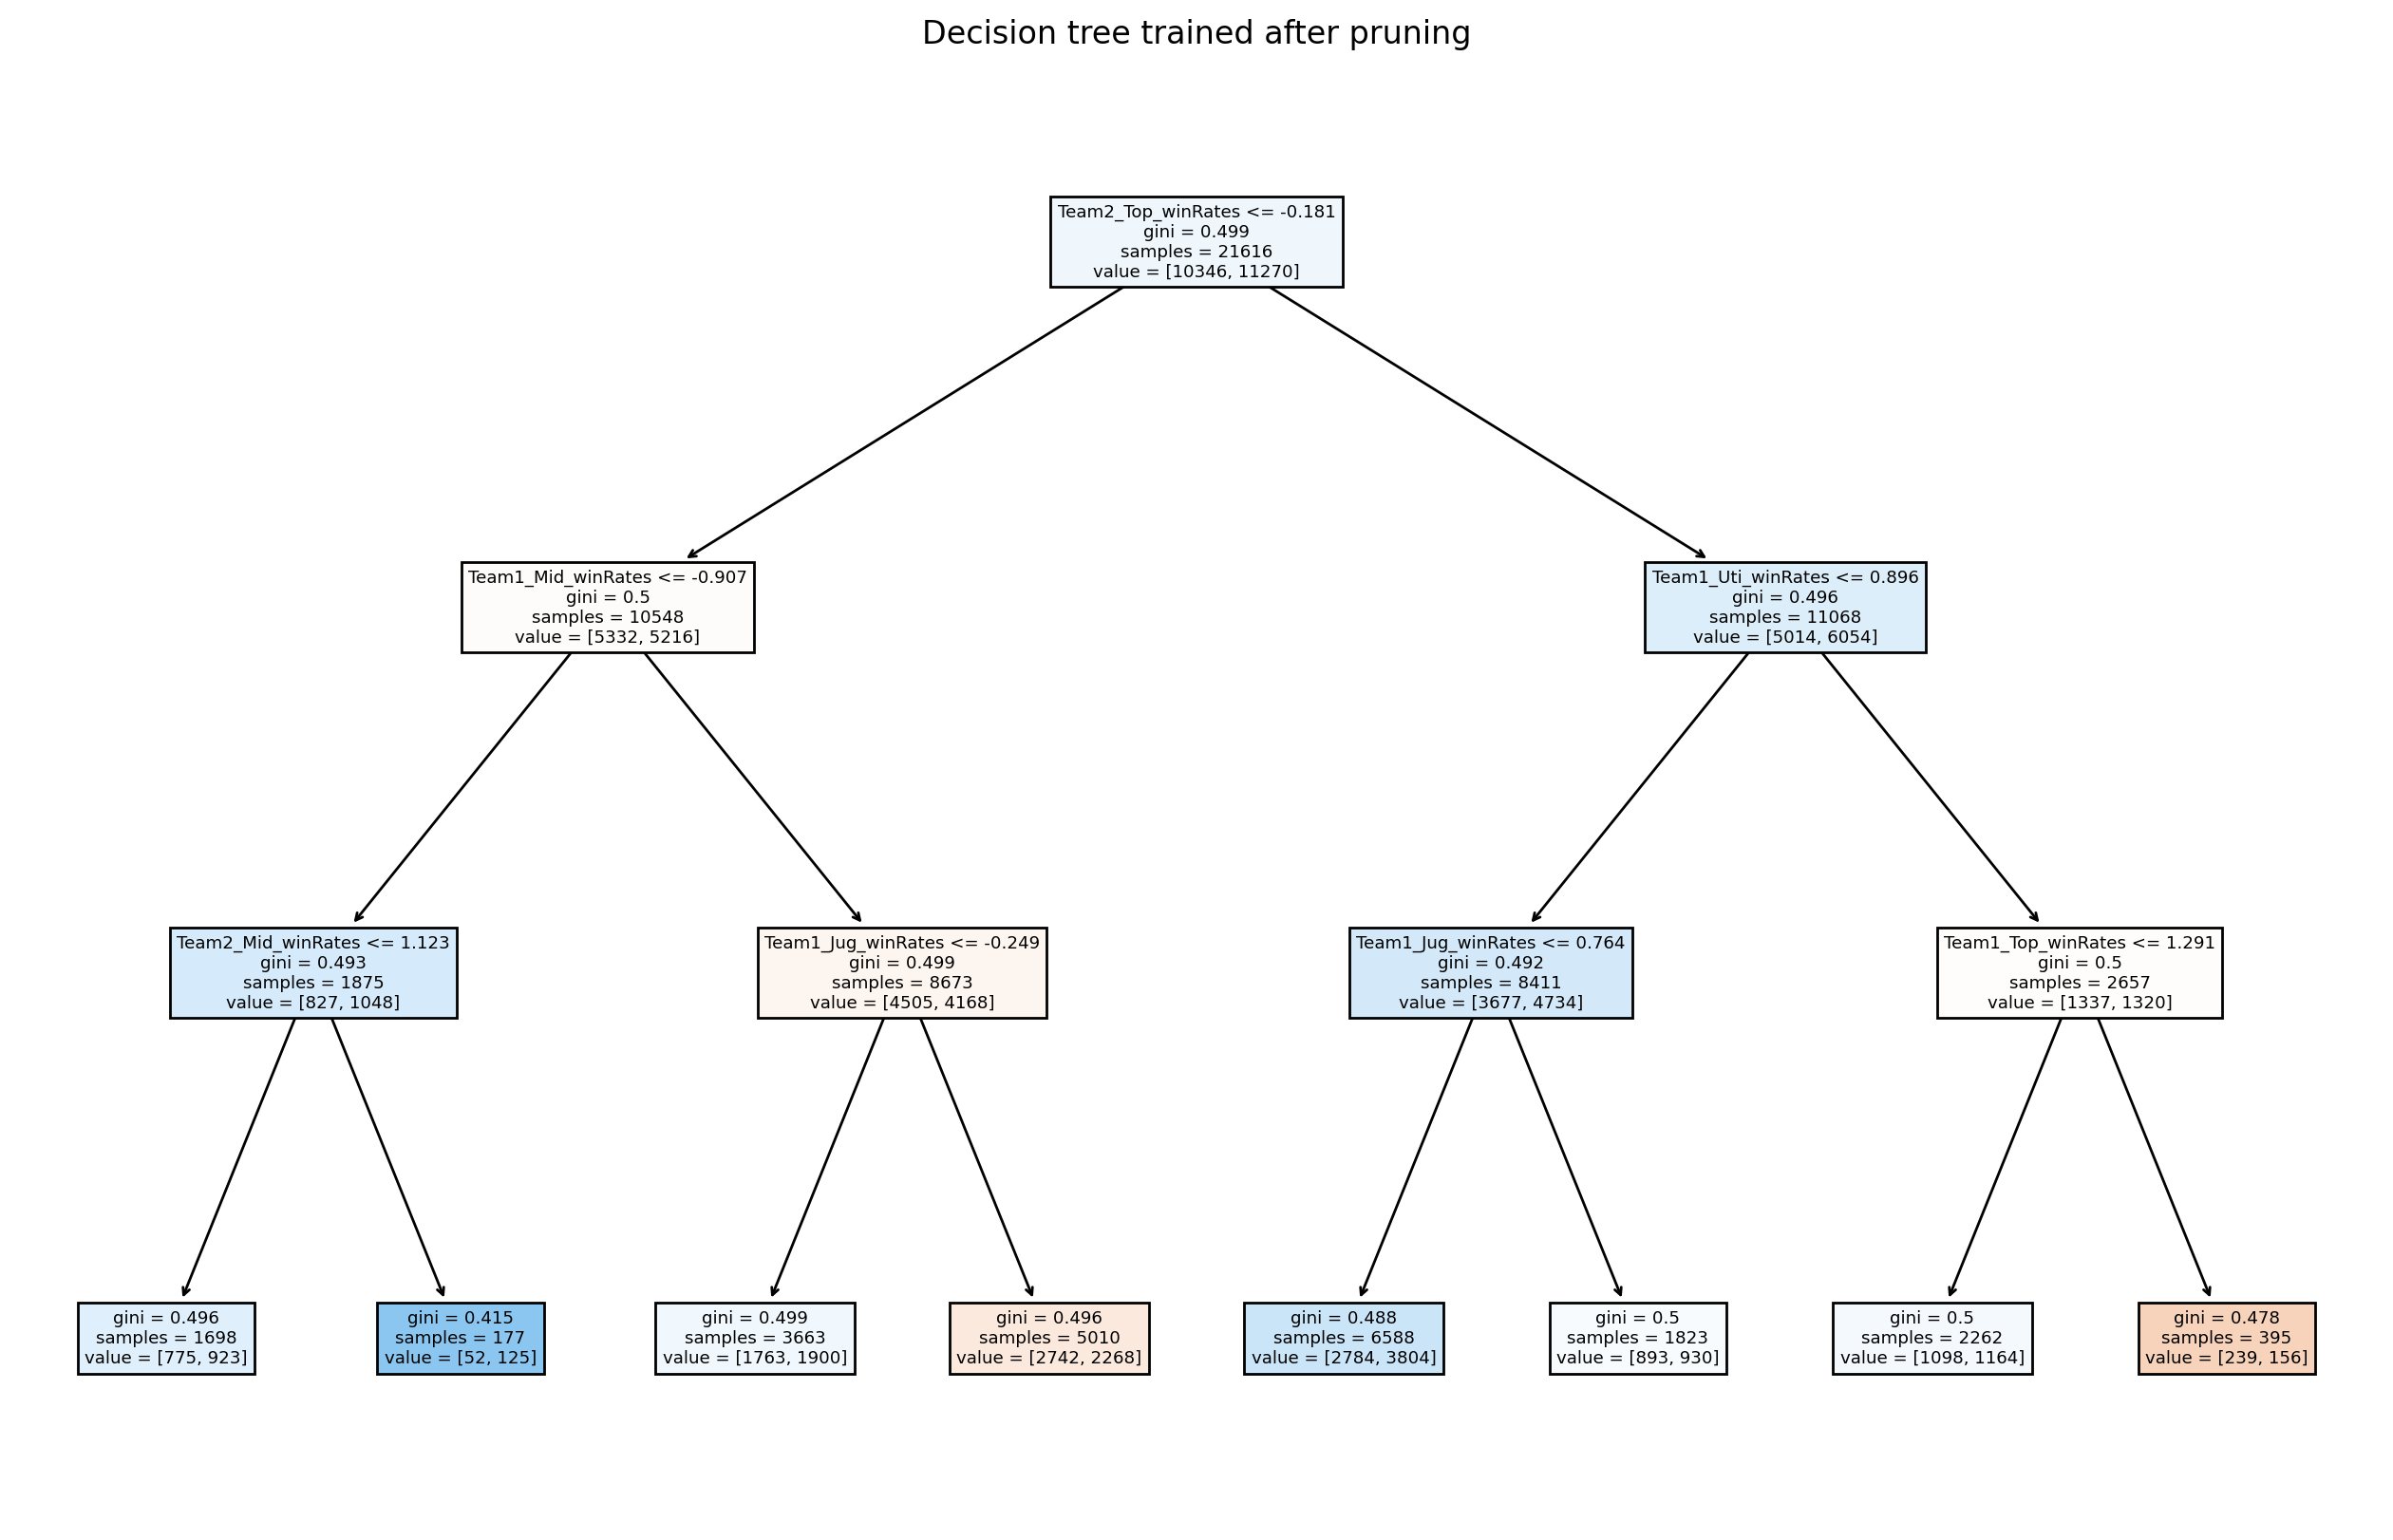

DecisionTreeClassifier(max_depth=3)

In [22]:
runModel(pre_all,3)
runModel(mid_all,3)
runModel(late_all,3)

              precision    recall  f1-score   support

         100       0.94      0.83      0.88      8307
         200       0.86      0.95      0.90      8846

    accuracy                           0.89     17153
   macro avg       0.90      0.89      0.89     17153
weighted avg       0.90      0.89      0.89     17153



<Figure size 640x480 with 0 Axes>

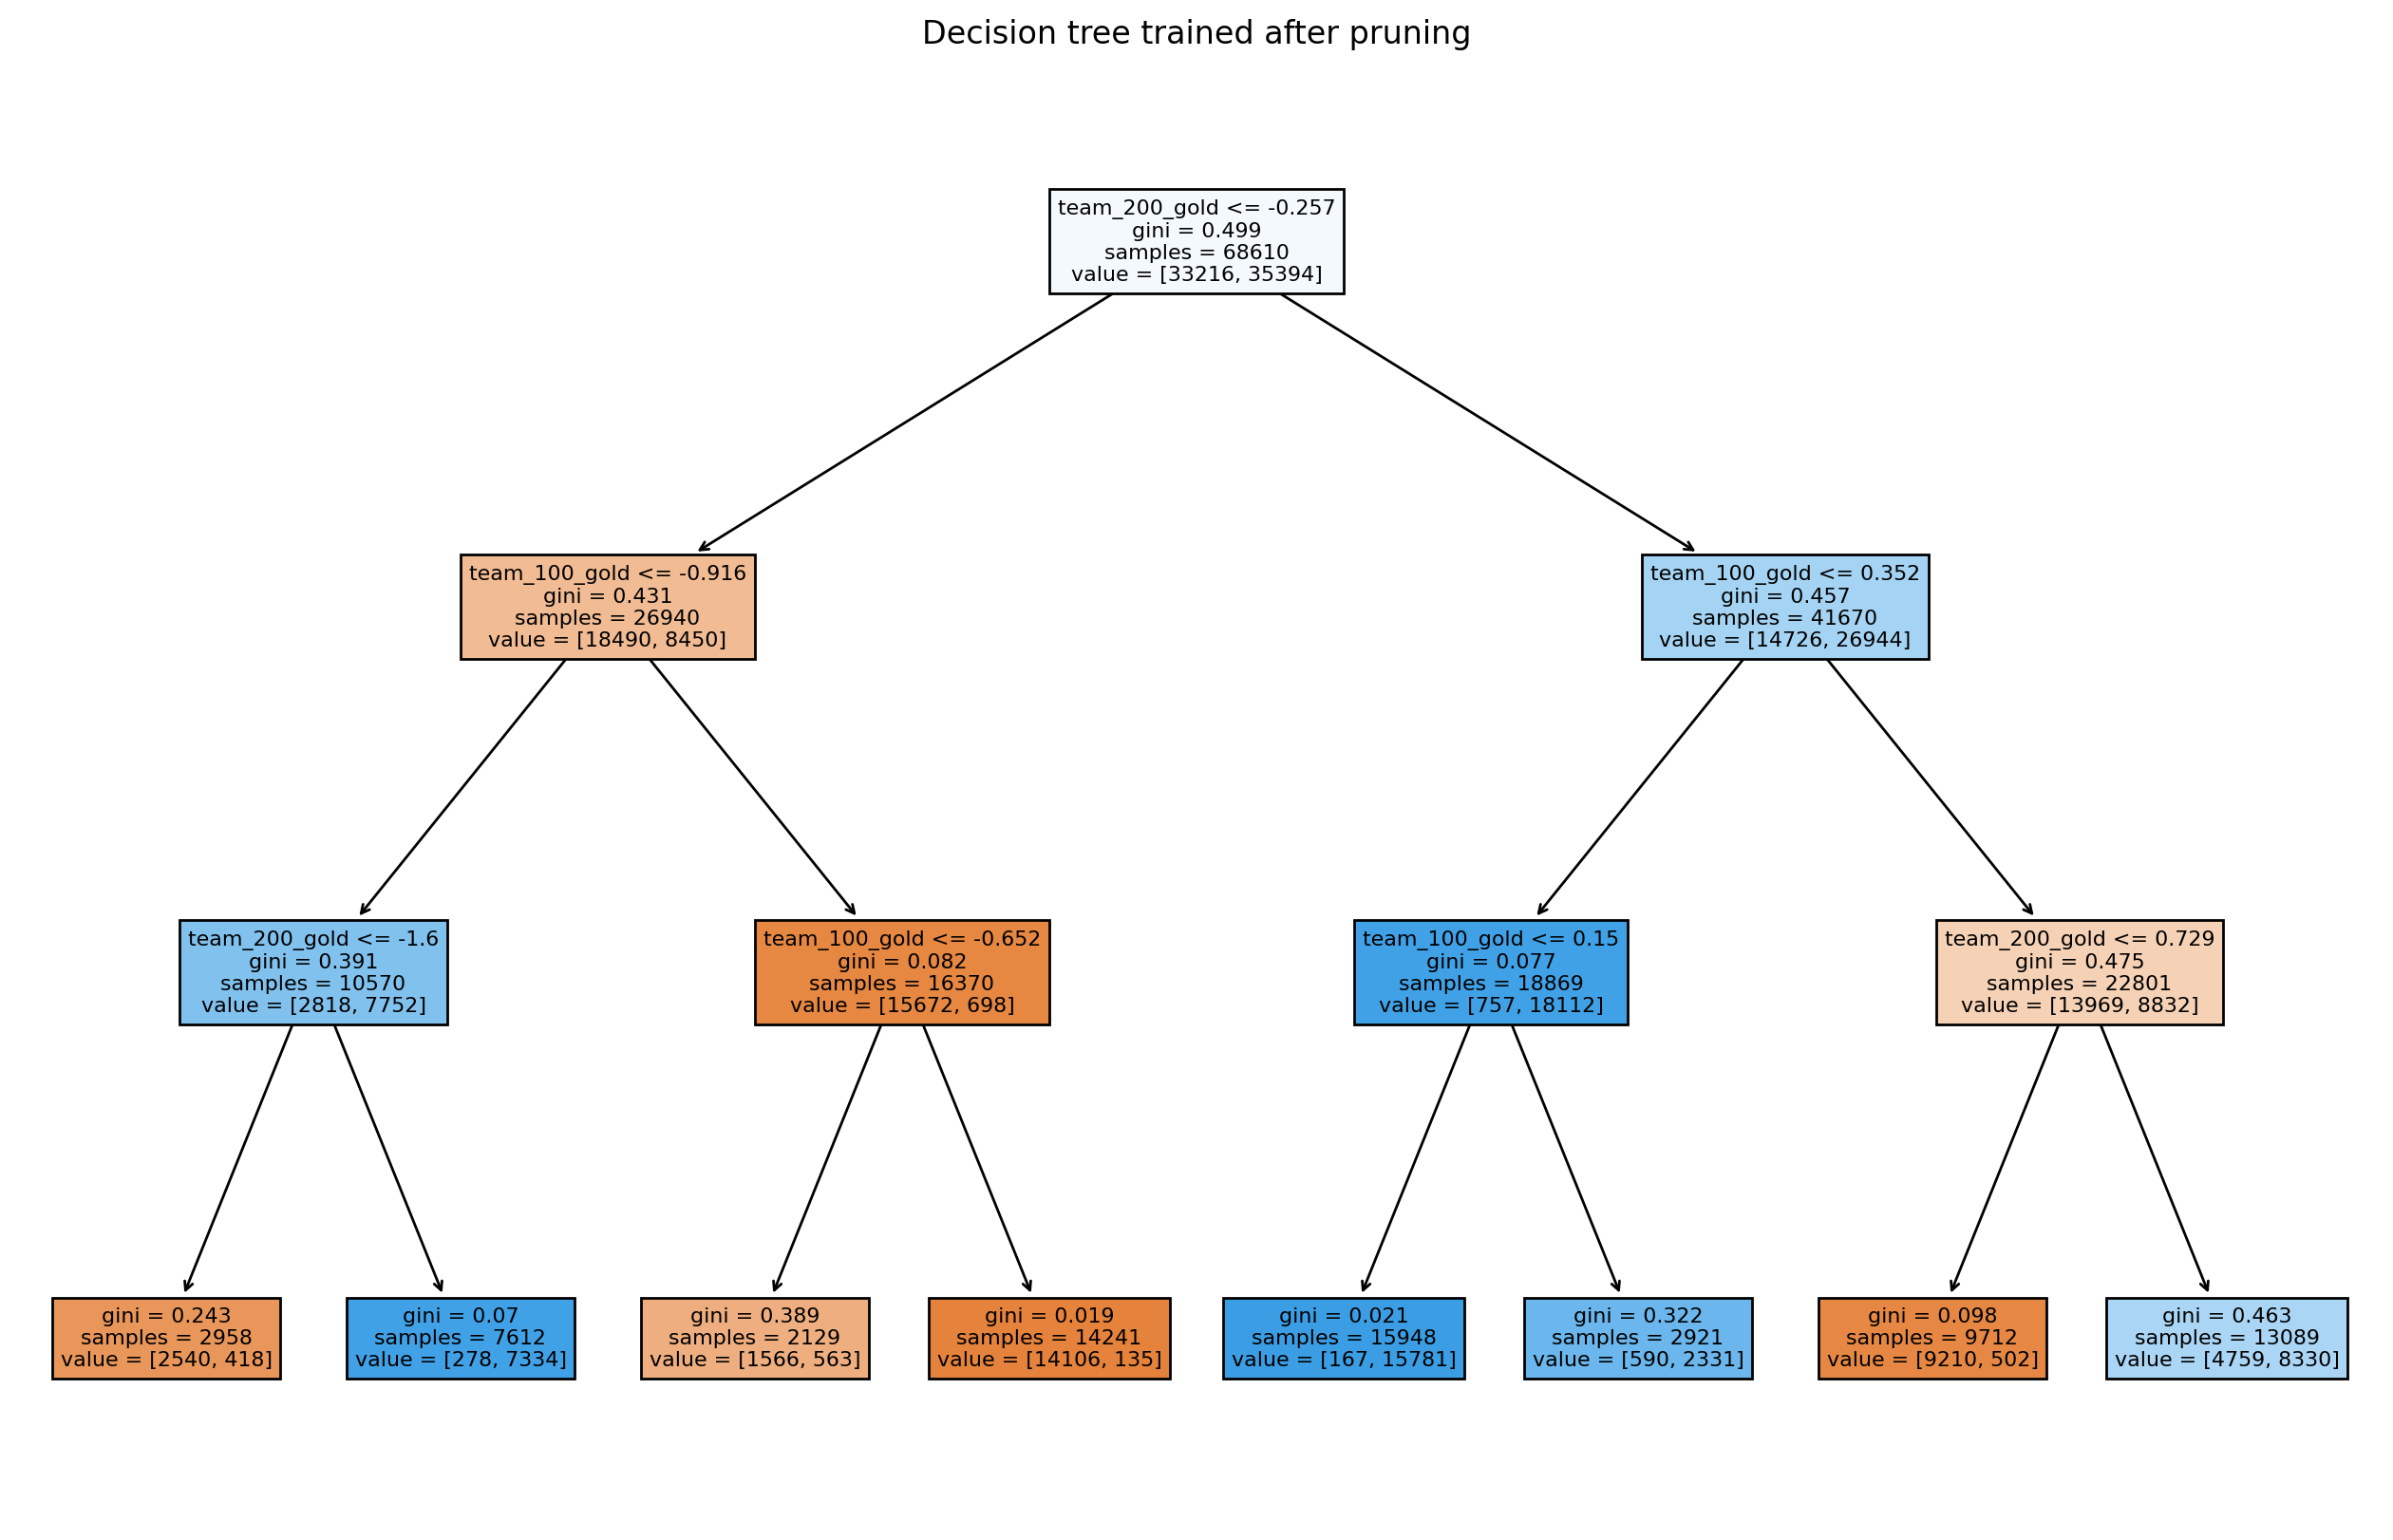

DecisionTreeClassifier(max_depth=3)

In [26]:
runModel(raw,3)

In [29]:
pre_all_gold

,Top_counterScore,Jug_counterScore,Mid_counterScore,Bot_counterScore,Uti_counterScore,Team1_Top_attackScore,Team1_Jug_attackScore,Team1_Mid_attackScore,Team1_Bot_attackScore,Team1_Uti_attackScore,...,Team2_Top_goldAbility,Team2_Jug_controlScore,Team2_Jug_goldAbility,Team2_Mid_controlScore,Team2_Mid_goldAbility,Team2_Bot_controlScore,Team2_Bot_goldAbility,Team2_Uti_controlScore,Team2_Uti_goldAbility,TeamVictory
0,-569.769231,-8.500000,-1597.315789,-1921.459091,1425.714286,395.45,502.65,516.89,505.64,171.68,...,447.5252,405.2747,391.9811,276.2722,374.2094,424.6025,364.6322,479.2949,292.7926,100
1,-662.225806,-1107.869565,0.000000,-58.440000,-139.457143,395.45,459.23,489.64,501.32,220.24,...,404.5409,409.4827,408.5521,284.5400,411.2187,381.5360,393.3245,341.1135,277.5473,200
2,-714.315789,-423.875000,-472.241379,-1921.459091,-464.000000,458.45,431.20,558.91,505.64,251.09,...,434.3110,394.5380,391.9811,279.8668,369.2704,435.0656,404.5409,479.2949,272.0786,200
3,-455.454545,-472.074074,608.932432,-2338.644444,410.300000,488.24,479.37,460.00,505.64,243.59,...,438.5290,416.6809,391.9811,295.9772,409.4827,447.5252,405.2747,505.5837,283.6457,200
4,640.684211,-1075.000000,-420.983607,-597.052830,-301.200000,410.39,433.31,558.91,449.29,209.71,...,386.4053,394.5380,420.4299,270.1667,377.8251,431.5036,403.4081,391.9811,277.5473,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,-370.222222,0.000000,0.000000,1099.854167,367.823529,508.10,487.12,558.91,612.05,242.87,...,374.2094,394.5380,505.5837,277.5473,396.8076,434.9918,370.9269,408.7203,270.2112,100
9846,0.000000,-154.949495,1621.933333,860.736842,1960.100000,410.39,384.91,408.34,505.64,474.82,...,381.5360,377.2240,391.9811,356.6495,330.4614,394.8169,404.5409,411.6502,292.8222,100
9847,0.000000,138.190476,-207.529412,0.000000,-1324.254717,520.69,396.17,487.80,384.33,450.75,...,394.8169,364.6322,390.0608,348.7250,415.4504,422.6996,386.6361,420.4299,270.2112,200
9848,-311.636364,0.000000,0.000000,-83.076923,135.727891,497.03,458.17,477.52,489.90,239.92,...,378.1892,373.9674,412.4272,277.7328,380.6484,376.1248,413.0756,420.4299,284.5400,200


              precision    recall  f1-score   support

         100       0.55      0.67      0.60       969
         200       0.59      0.46      0.52      1001

    accuracy                           0.56      1970
   macro avg       0.57      0.57      0.56      1970
weighted avg       0.57      0.56      0.56      1970



<Figure size 640x480 with 0 Axes>

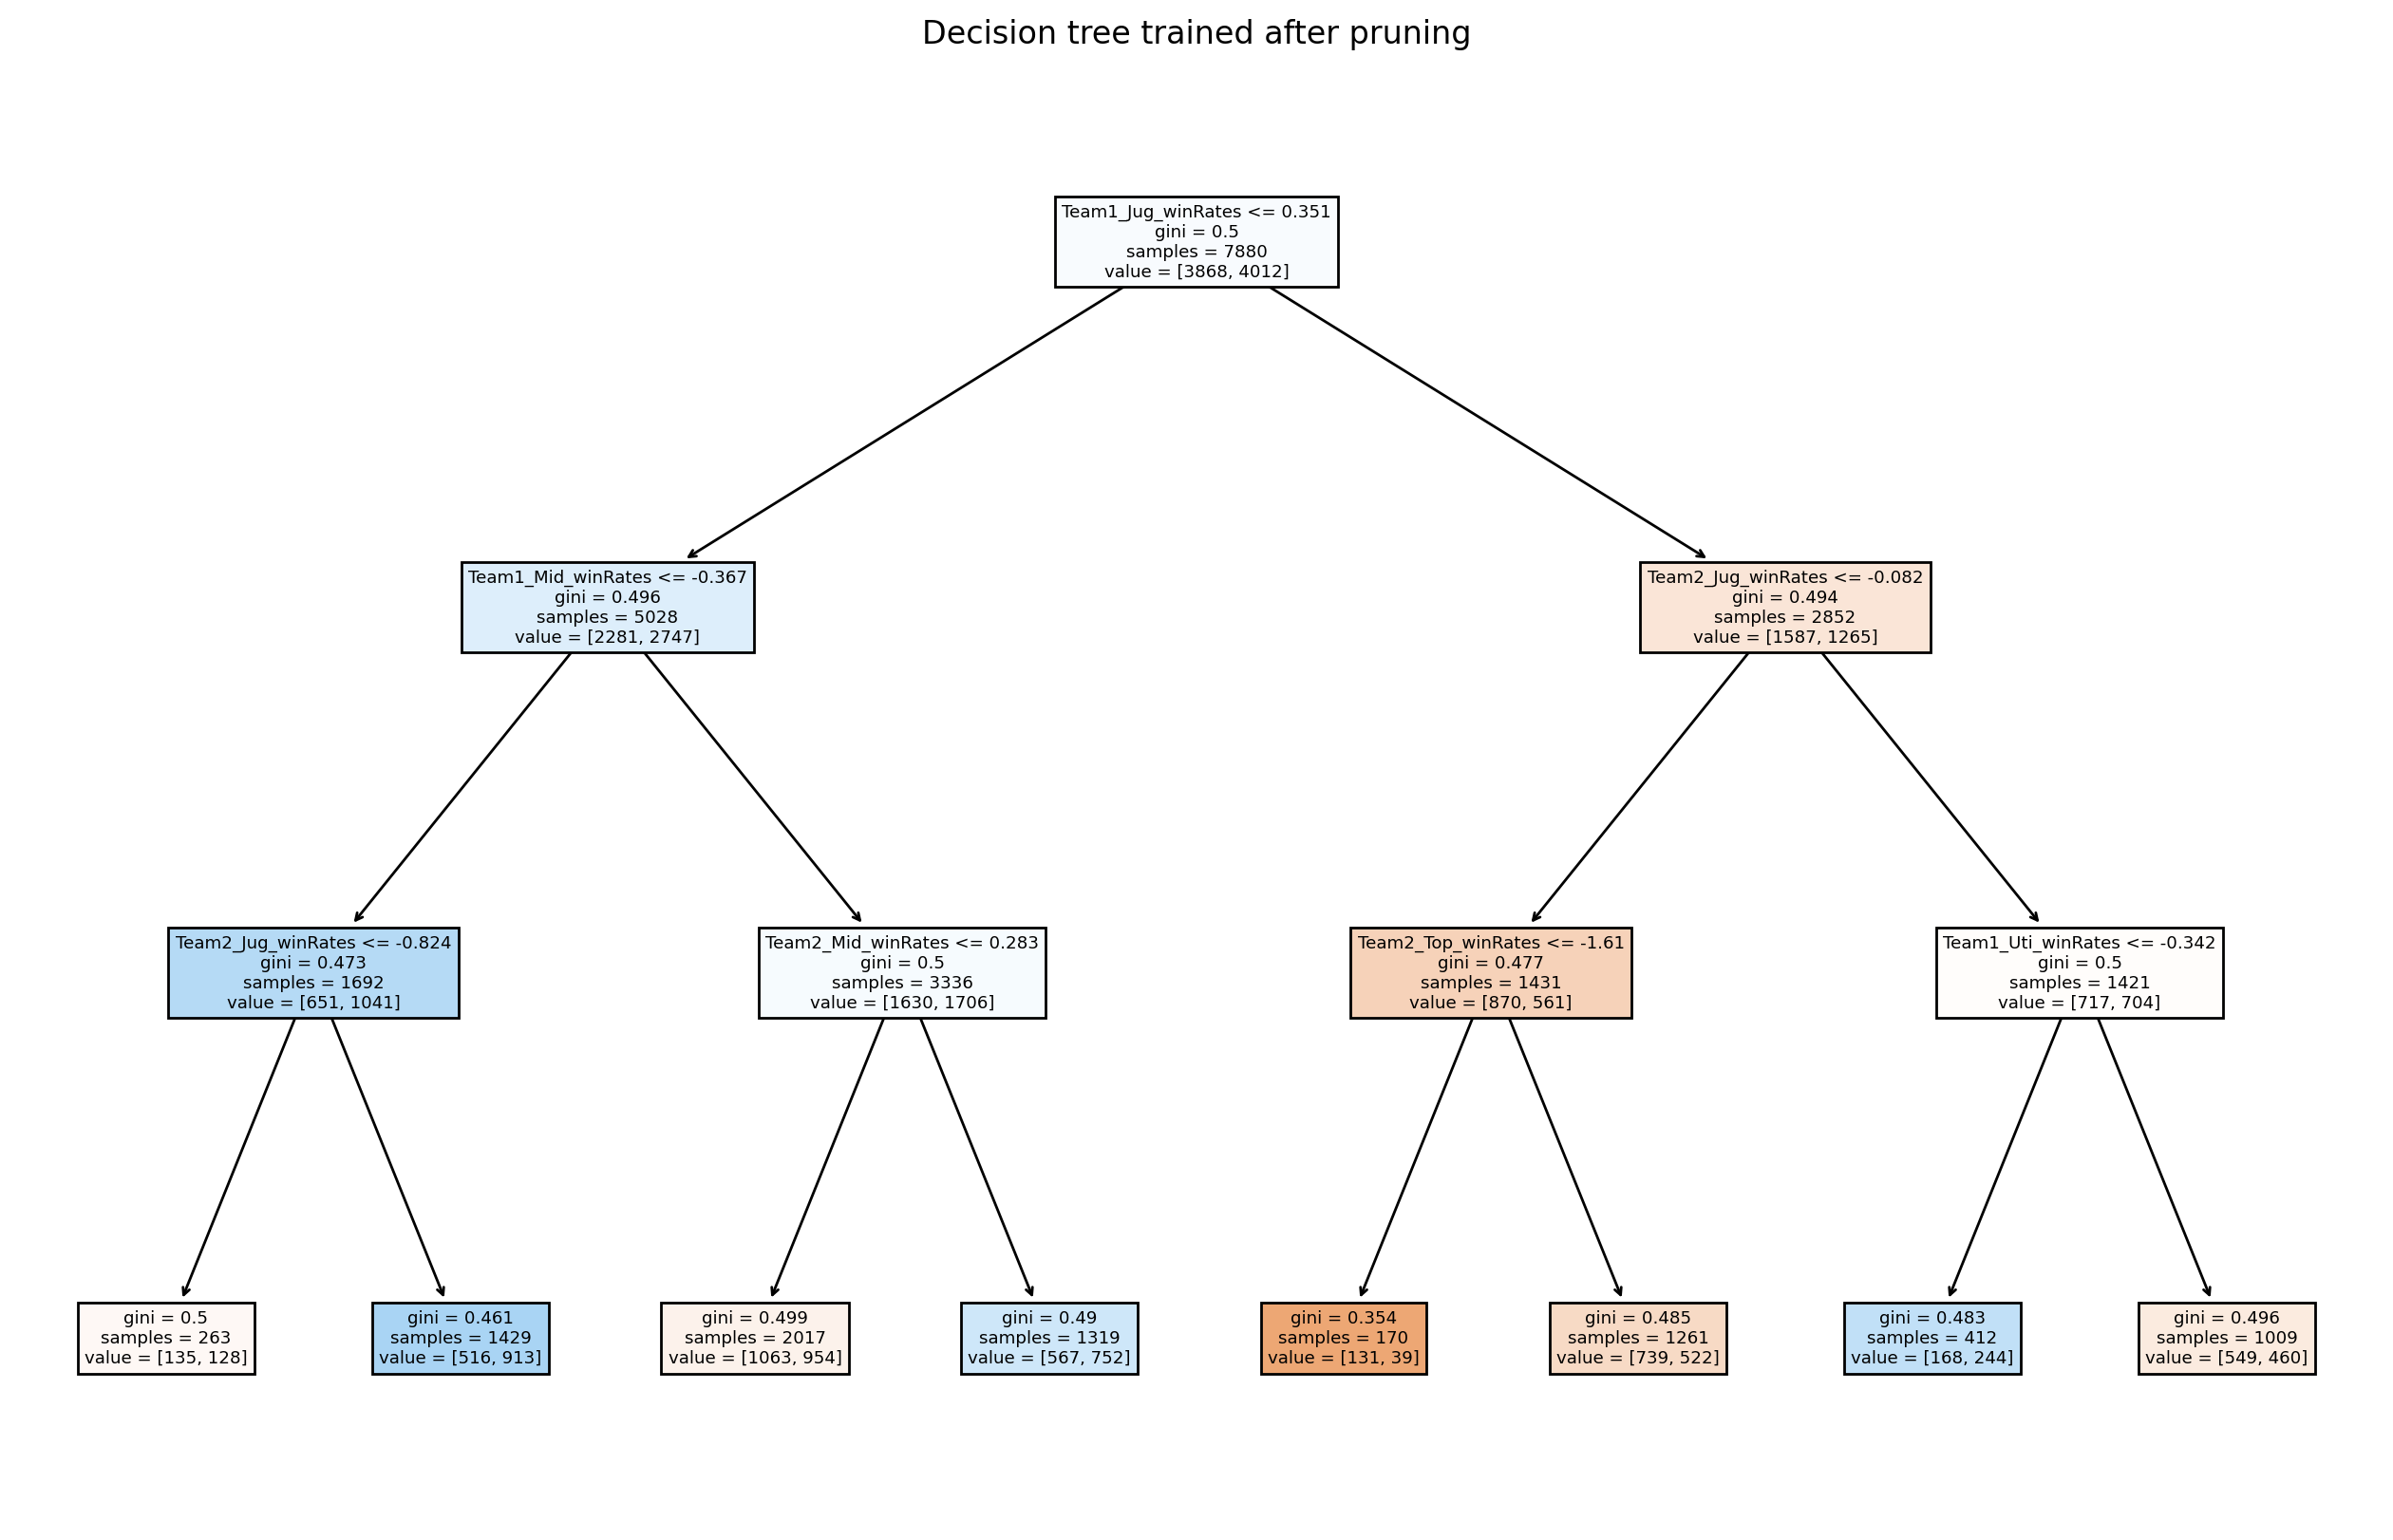

DecisionTreeClassifier(max_depth=3)

In [4]:
runModel(pre_all_gold,3)